In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import math
import matplotlib.pyplot as plt


In [15]:
ccrb1 = pd.read_csv('/Users/tfagin/Downloads/Civilian_Complaint_Review_Board__Allegations_Against_Police_Officers_20241217.csv')

ccrb1.head()

,As Of Date,Complaint Id,Complaint Officer Number,Tax ID,Officer Rank Abbreviation At Incident,Officer Rank At Incident,Officer Command At Incident,Officer Days On Force At Incident,Allegation Record Identity,FADO Type,Allegation,Victim/Alleged Victim Age Range At Incident,Victim/Alleged Victim Gender,Victim / Alleged Victim Race (Legacy),Victim / Alleged Victim Race / Ethnicity,CCRB Allegation Disposition,NYPD Allegation Disposition,Investigator Recommendation
0,12/16/2024,200401463,1,NaN,NaN,NaN,NaN,0.0,387667,Abuse of Authority,Threat of arrest,24 < Age <= 29,Female/Woman,Black,NaN,Alleged Victim Uncooperative,NaN,Alleged Victim Uncooperative
1,12/16/2024,201609656,1,NaN,NaN,NaN,113,0.0,969935,Abuse of Authority,Premises entered and/or searched,NaN,NaN,NaN,NaN,Exonerated,NaN,Exonerated
2,12/16/2024,201305470,2,NaN,NaN,NaN,NaN,0.0,847857,Force,Physical force,17 < Age <= 20,Male/Man,Unknown,NaN,Complainant Unavailable,NaN,Complainant Unavailable
3,12/16/2024,200000512,1,911792.0,POM,Police Officer,TD DT30,2341.0,235716,Discourtesy,Word,14 < Age <= 17,Female/Woman,White,NaN,Complainant Uncooperative,NaN,Complainant Uncooperative
4,12/16/2024,201011748,1,NaN,NaN,NaN,NaN,0.0,708213,Force,Physical force,NaN,Female/Woman,NaN,NaN,Complainant Unavailable,NaN,Complainant Unavailable


In [16]:
ccrb2 = pd.read_csv('/Users/tfagin/Downloads/Civilian_Complaint_Review_Board__Complaints_Against_Police_Officers_20241217.csv')

ccrb2.head()

,As Of Date,Complaint Id,Incident Date,Incident Hour,CCRB Received Date,Close Date,Borough Of Incident Occurrence,Precinct Of Incident Occurrence,Location Type Of Incident,Reason for Police Contact,Outcome Of Police Encounter,CCRB Complaint Disposition,BWC Evidence,Video Evidence
0,12/16/2024,200308843,2003-11-01,3.0,11/06/2003 06:41:59 PM,01/08/2004 10:22:58 AM,Brooklyn,83,Other,Other,No arrest made or summons issued,Complaint Withdrawn,No,No
1,12/16/2024,202202057,2021-08-17,18.0,04/01/2022 02:21:00 PM,07/27/2022 09:38:24 AM,Bronx,42,Residential building,Report of other crime,Arrest - other violation/crime,Closed - Pending Litigation,No,No
2,12/16/2024,201507342,2015-08-31,NaN,08/31/2015 12:00:00 AM,04/21/2016 07:43:23 PM,Queens,113,Street/highway,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Officer(s) Unidentified,No,No
3,12/16/2024,201907170,2019-08-12,17.0,08/13/2019 10:17:11 AM,12/02/2019 10:14:15 AM,Manhattan,20,Street/highway,Other,No arrest made or summons issued,Complaint Withdrawn,No,No
4,12/16/2024,200501211,2005-01-27,11.0,02/03/2005 04:01:37 PM,10/05/2005 01:39:26 PM,Manhattan,23,Apartment/house,Execution of search warrant,Arrest - other violation/crime,Unfounded,No,No


In [17]:
ccrb3 = pd.read_csv('/Users/tfagin/Downloads/Civilian_Complaint_Review_Board__Allegations_Against_Police_Officers_20241217.csv')

ccrb3.head()

,As Of Date,Complaint Id,Complaint Officer Number,Tax ID,Officer Rank Abbreviation At Incident,Officer Rank At Incident,Officer Command At Incident,Officer Days On Force At Incident,Allegation Record Identity,FADO Type,Allegation,Victim/Alleged Victim Age Range At Incident,Victim/Alleged Victim Gender,Victim / Alleged Victim Race (Legacy),Victim / Alleged Victim Race / Ethnicity,CCRB Allegation Disposition,NYPD Allegation Disposition,Investigator Recommendation
0,12/16/2024,200401463,1,NaN,NaN,NaN,NaN,0.0,387667,Abuse of Authority,Threat of arrest,24 < Age <= 29,Female/Woman,Black,NaN,Alleged Victim Uncooperative,NaN,Alleged Victim Uncooperative
1,12/16/2024,201609656,1,NaN,NaN,NaN,113,0.0,969935,Abuse of Authority,Premises entered and/or searched,NaN,NaN,NaN,NaN,Exonerated,NaN,Exonerated
2,12/16/2024,201305470,2,NaN,NaN,NaN,NaN,0.0,847857,Force,Physical force,17 < Age <= 20,Male/Man,Unknown,NaN,Complainant Unavailable,NaN,Complainant Unavailable
3,12/16/2024,200000512,1,911792.0,POM,Police Officer,TD DT30,2341.0,235716,Discourtesy,Word,14 < Age <= 17,Female/Woman,White,NaN,Complainant Uncooperative,NaN,Complainant Uncooperative
4,12/16/2024,201011748,1,NaN,NaN,NaN,NaN,0.0,708213,Force,Physical force,NaN,Female/Woman,NaN,NaN,Complainant Unavailable,NaN,Complainant Unavailable


In [18]:
ccrb = pd.merge(ccrb1, ccrb2, on='Complaint Id', how='outer')

ccrb.head()

,As Of Date_x,Complaint Id,Complaint Officer Number,Tax ID,Officer Rank Abbreviation At Incident,Officer Rank At Incident,Officer Command At Incident,Officer Days On Force At Incident,Allegation Record Identity,FADO Type,...,CCRB Received Date,Close Date,Borough Of Incident Occurrence,Precinct Of Incident Occurrence,Location Type Of Incident,Reason for Police Contact,Outcome Of Police Encounter,CCRB Complaint Disposition,BWC Evidence,Video Evidence
0,12/16/2024,200401463,1.0,NaN,NaN,NaN,NaN,0.0,387667.0,Abuse of Authority,...,02/19/2004 10:29:30 AM,05/12/2005 09:46:00 AM,Brooklyn,79,Apartment/house,Execution of search warrant,Summons - other violation/crime,Unsubstantiated,No,No
1,12/16/2024,200401463,1.0,NaN,NaN,NaN,NaN,0.0,387671.0,Discourtesy,...,02/19/2004 10:29:30 AM,05/12/2005 09:46:00 AM,Brooklyn,79,Apartment/house,Execution of search warrant,Summons - other violation/crime,Unsubstantiated,No,No
2,12/16/2024,200401463,1.0,NaN,NaN,NaN,NaN,NaN,387670.0,Force,...,02/19/2004 10:29:30 AM,05/12/2005 09:46:00 AM,Brooklyn,79,Apartment/house,Execution of search warrant,Summons - other violation/crime,Unsubstantiated,No,No
3,12/16/2024,200401463,2.0,901642.0,SGT,Sergeant,GANG BN,4244.0,387675.0,Discourtesy,...,02/19/2004 10:29:30 AM,05/12/2005 09:46:00 AM,Brooklyn,79,Apartment/house,Execution of search warrant,Summons - other violation/crime,Unsubstantiated,No,No
4,12/16/2024,200401463,1.0,NaN,NaN,NaN,NaN,0.0,387668.0,Discourtesy,...,02/19/2004 10:29:30 AM,05/12/2005 09:46:00 AM,Brooklyn,79,Apartment/house,Execution of search warrant,Summons - other violation/crime,Unsubstantiated,No,No


In [16]:

# Convert the 'Close Date' column to datetime format and strip out the timestamp
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

# Define date ranges for Bloomberg, de Blasio, and Adams administrations
bloomberg_start = pd.to_datetime('2002-01-01').date()
bloomberg_end = pd.to_datetime('2013-12-31').date()

deblasio_start = pd.to_datetime('2014-01-01').date()
deblasio_end = pd.to_datetime('2021-12-31').date()

adams_start = pd.to_datetime('2022-01-01').date()
adams_end = pd.to_datetime('2024-12-16').date()

# Filter data for each administration
bloomberg_data = ccrb[(ccrb['Close Date'] >= bloomberg_start) & (ccrb['Close Date'] <= bloomberg_end)]
deblasio_data = ccrb[(ccrb['Close Date'] >= deblasio_start) & (ccrb['Close Date'] <= deblasio_end)]
adams_data = ccrb[(ccrb['Close Date'] >= adams_start) & (ccrb['Close Date'] <= adams_end)]

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Calculate rates for each administration
def calculate_complaint_rates(data, administration_name):
    total_complaints = len(data)
    
    if total_complaints == 0:
        print(f"No complaints for {administration_name} Administration.")
        return
    
    # Filter data for various forms of Substantiated outcomes
    substantiated_data = data[data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    substantiated_complaints = len(substantiated_data)
    
    unsubstantiated_complaints = total_complaints - substantiated_complaints

    substantiated_rate = substantiated_complaints / total_complaints * 100
    unsubstantiated_rate = unsubstantiated_complaints / total_complaints * 100

    print(f"{administration_name} Administration:")
    print(f"Total Complaints: {total_complaints}")
    print(f"Substantiated Rate: {substantiated_rate:.2f}%")
    print(f"Unsubstantiated Rate: {unsubstantiated_rate:.2f}%")
    print()

calculate_complaint_rates(bloomberg_data, "Bloomberg")
calculate_complaint_rates(deblasio_data, "de Blasio")
calculate_complaint_rates(adams_data, "Adams")

Bloomberg Administration:
Total Complaints: 218933
Substantiated Rate: 2.97%
Unsubstantiated Rate: 97.03%

de Blasio Administration:
Total Complaints: 102913
Substantiated Rate: 4.29%
Unsubstantiated Rate: 95.71%

Adams Administration:
Total Complaints: 62530
Substantiated Rate: 11.46%
Unsubstantiated Rate: 88.54%



In [42]:
import pandas as pd

# Convert the 'Close Date' column to datetime format
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], format='%m/%d/%Y %I:%M:%S %p')

# Define date ranges for Bloomberg, de Blasio, and Adams administrations
bloomberg_start = pd.to_datetime('2002-01-01')
bloomberg_end = pd.to_datetime('2013-12-31')

deblasio_start = pd.to_datetime('2014-01-01')
deblasio_end = pd.to_datetime('2021-12-31')

adams_start = pd.to_datetime('2022-01-01')
adams_end = pd.to_datetime('2024-12-16')

# Filter data for each administration
bloomberg_data = ccrb[(ccrb['Close Date'] >= bloomberg_start) & (ccrb['Close Date'] <= bloomberg_end)]
deblasio_data = ccrb[(ccrb['Close Date'] >= deblasio_start) & (ccrb['Close Date'] <= deblasio_end)]
adams_data = ccrb[(ccrb['Close Date'] >= adams_start) & (ccrb['Close Date'] <= adams_end)]

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Function to calculate month-by-month figures in ISO 8601 format
def calculate_monthly_complaints(data, administration_name):
    if data.empty:
        print(f"No complaints for {administration_name} Administration.")
        return []
    
    # Extract year and month for grouping
    data['Year-Month'] = data['Close Date'].dt.to_period('M')
    
    # Group by month and calculate totals
    monthly_data = data.groupby('Year-Month')
    
    results = []
    
    for period, group in monthly_data:
        total_complaints = len(group)
        substantiated_count = len(group[group['CCRB Allegation Disposition'].isin(substantiated_forms)])
        unsubstantiated_count = total_complaints - substantiated_count
        
        # Format 'Year-Month' as ISO 8601 date (e.g., "2024-01-01")
        iso_date = pd.Period(period, freq='M').start_time.strftime('%Y-%m-%d')
        
        results.append({
            'Date': iso_date,
            'Total Complaints': total_complaints,
            'Substantiated': substantiated_count,
            'Unsubstantiated': unsubstantiated_count
        })
    
    return results

# Calculate for each administration
bloomberg_results = calculate_monthly_complaints(bloomberg_data, "Bloomberg")
deblasio_results = calculate_monthly_complaints(deblasio_data, "de Blasio")
adams_results = calculate_monthly_complaints(adams_data, "Adams")

# Combine all results into a single list for export
all_results = {
    "Bloomberg": bloomberg_results,
    "de Blasio": deblasio_results,
    "Adams": adams_results
}

# Print results for debugging
import json
print(json.dumps(all_results, indent=2))  # Nicely formatted JSON for debugging or export

/var/folders/xr/1s8qgqx11ql2kctd1jkz8j55q0752x/T/ipykernel_2981/3746230546.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year-Month'] = data['Close Date'].dt.to_period('M')
/var/folders/xr/1s8qgqx11ql2kctd1jkz8j55q0752x/T/ipykernel_2981/3746230546.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year-Month'] = data['Close Date'].dt.to_period('M')
/var/folders/xr/1s8qgqx11ql2kctd1jkz8j55q0752x/T/ipykernel_2981/3746230546.py:33: SettingWithCopyWarning: 
A value is trying to be set on a 

{
  "Bloomberg": [
    {
      "Date": "2002-01-01",
      "Total Complaints": 966,
      "Substantiated": 17,
      "Unsubstantiated": 949
    },
    {
      "Date": "2002-02-01",
      "Total Complaints": 532,
      "Substantiated": 20,
      "Unsubstantiated": 512
    },
    {
      "Date": "2002-03-01",
      "Total Complaints": 1884,
      "Substantiated": 85,
      "Unsubstantiated": 1799
    },
    {
      "Date": "2002-04-01",
      "Total Complaints": 1603,
      "Substantiated": 71,
      "Unsubstantiated": 1532
    },
    {
      "Date": "2002-05-01",
      "Total Complaints": 880,
      "Substantiated": 26,
      "Unsubstantiated": 854
    },
    {
      "Date": "2002-06-01",
      "Total Complaints": 1042,
      "Substantiated": 27,
      "Unsubstantiated": 1015
    },
    {
      "Date": "2002-07-01",
      "Total Complaints": 1014,
      "Substantiated": 40,
      "Unsubstantiated": 974
    },
    {
      "Date": "2002-08-01",
      "Total Complaints": 334,
      "Substa

In [11]:
# Define the allegation of interest
allegation_of_interest = 'Chokehold'

# Filter data for the specified allegation
chokehold_data = ccrb[ccrb['Allegation'] == allegation_of_interest]

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Calculate rates for the specified allegation
def calculate_substantiation_rates(data, allegation_name):
    total_complaints = len(data)
    
    if total_complaints == 0:
        print(f"No complaints for the allegation: {allegation_name}")
        return
    
    # Filter data for various forms of Substantiated outcomes
    substantiated_data = data[data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    substantiated_complaints = len(substantiated_data)
    
    unsubstantiated_complaints = total_complaints - substantiated_complaints

    substantiated_rate = substantiated_complaints / total_complaints * 100
    unsubstantiated_rate = unsubstantiated_complaints / total_complaints * 100

    print(f"Rates for the allegation: {allegation_name}")
    print(f"Total Complaints: {total_complaints}")
    print(f"Substantiated Rate: {substantiated_rate:.2f}%")
    print(f"Unsubstantiated Rate: {unsubstantiated_rate:.2f}%")
    print()

calculate_substantiation_rates(chokehold_data, "Chokehold")

Rates for the allegation: Chokehold
Total Complaints: 3932
Substantiated Rate: 3.23%
Unsubstantiated Rate: 96.77%



In [7]:
import pandas as pd

# Convert the 'Close Date' column to datetime format
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], format='%m/%d/%Y %I:%M:%S %p')

# Define date ranges for Bloomberg, de Blasio, and Adams administrations
bloomberg_start = pd.to_datetime('2002-01-01')
bloomberg_end = pd.to_datetime('2013-12-31')

deblasio_start = pd.to_datetime('2014-01-01')
deblasio_end = pd.to_datetime('2021-12-31')

adams_start = pd.to_datetime('2022-01-01')
adams_end = pd.to_datetime('2024-12-16')

# Filter data for each administration
bloomberg_data = ccrb[(ccrb['Close Date'] >= bloomberg_start) & (ccrb['Close Date'] <= bloomberg_end)]
deblasio_data = ccrb[(ccrb['Close Date'] >= deblasio_start) & (ccrb['Close Date'] <= deblasio_end)]
adams_data = ccrb[(ccrb['Close Date'] >= adams_start) & (ccrb['Close Date'] <= adams_end)]

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Function to calculate yearly figures
def calculate_yearly_complaints(data, administration_name):
    if data.empty:
        print(f"No complaints for {administration_name} Administration.")
        return []
    
    # Extract year for grouping
    data['Year'] = data['Close Date'].dt.year
    
    # Group by year and calculate totals
    yearly_data = data.groupby('Year')
    
    results = []
    
    for year, group in yearly_data:
        total_complaints = len(group)
        substantiated_count = len(group[group['CCRB Allegation Disposition'].isin(substantiated_forms)])
        unsubstantiated_count = total_complaints - substantiated_count
        
        # Format year as ISO 8601 date (e.g., "2024-01-01")
        iso_date = f"{year}-01-01"
        
        results.append({
            'Year': year,
            'Date': iso_date,
            'Total Complaints': total_complaints,
            'Substantiated': substantiated_count,
            'Unsubstantiated': unsubstantiated_count
        })
    
    return results

# Calculate for each administration
bloomberg_results = calculate_yearly_complaints(bloomberg_data, "Bloomberg")
deblasio_results = calculate_yearly_complaints(deblasio_data, "de Blasio")
adams_results = calculate_yearly_complaints(adams_data, "Adams")

# Combine all results into a single list for export
all_results = {
    "Bloomberg": bloomberg_results,
    "de Blasio": deblasio_results,
    "Adams": adams_results
}

# Print results for debugging
import json
print(json.dumps(all_results, indent=2))  # Nicely formatted JSON for debugging or export

{
  "Bloomberg": [
    {
      "Year": 2002,
      "Date": "2002-01-01",
      "Total Complaints": 13099,
      "Substantiated": 516,
      "Unsubstantiated": 12583
    },
    {
      "Year": 2003,
      "Date": "2003-01-01",
      "Total Complaints": 12579,
      "Substantiated": 698,
      "Unsubstantiated": 11881
    },
    {
      "Year": 2004,
      "Date": "2004-01-01",
      "Total Complaints": 16482,
      "Substantiated": 988,
      "Unsubstantiated": 15494
    },
    {
      "Year": 2005,
      "Date": "2005-01-01",
      "Total Complaints": 18833,
      "Substantiated": 695,
      "Unsubstantiated": 18138
    },
    {
      "Year": 2006,
      "Date": "2006-01-01",
      "Total Complaints": 21769,
      "Substantiated": 576,
      "Unsubstantiated": 21193
    },
    {
      "Year": 2007,
      "Date": "2007-01-01",
      "Total Complaints": 24511,
      "Substantiated": 483,
      "Unsubstantiated": 24028
    },
    {
      "Year": 2008,
      "Date": "2008-01-01",
      "To

/var/folders/xr/1s8qgqx11ql2kctd1jkz8j55q0752x/T/ipykernel_56561/283448741.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Close Date'].dt.year
/var/folders/xr/1s8qgqx11ql2kctd1jkz8j55q0752x/T/ipykernel_56561/283448741.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Close Date'].dt.year
/var/folders/xr/1s8qgqx11ql2kctd1jkz8j55q0752x/T/ipykernel_56561/283448741.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [12]:
# Convert the 'Close Date' column to datetime format and strip out the timestamp
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

# Define the allegation of interest
allegation_of_interest = 'Chokehold'

# Define the date of the Eric Garner incident
eric_garner_incident_date = pd.to_datetime('2014-07-17').date()

# Split data into before and after Eric Garner incident
before_garner_data = ccrb[ccrb['Close Date'] < eric_garner_incident_date]
after_garner_data = ccrb[ccrb['Close Date'] >= eric_garner_incident_date]

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Calculate rates for the period before the Eric Garner incident
calculate_substantiation_rates(before_garner_data[before_garner_data['Allegation'] == allegation_of_interest], 
                               f"{allegation_of_interest} - Before Eric Garner Incident")

# Calculate rates for the period after the Eric Garner incident
calculate_substantiation_rates(after_garner_data[after_garner_data['Allegation'] == allegation_of_interest], 
                               f"{allegation_of_interest} - After Eric Garner Incident")

Rates for the allegation: Chokehold - Before Eric Garner Incident
Total Complaints: 2293
Substantiated Rate: 1.09%
Unsubstantiated Rate: 98.91%

Rates for the allegation: Chokehold - After Eric Garner Incident
Total Complaints: 1639
Substantiated Rate: 6.22%
Unsubstantiated Rate: 93.78%



In [17]:

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Define race categories
race_categories = ['Hispanic', 'Black', 'White', 'Asian', 'Other Race', 'Unknown']

# Calculate rates for each race category
def calculate_substantiation_rates_by_race(data, race_category):
    race_data = data[data['Victim / Alleged Victim Race (Legacy)'] == race_category]
    
    total_complaints = len(race_data)
    
    if total_complaints == 0:
        print(f"No complaints for the race category: {race_category}")
        return
    
    # Filter data for various forms of Substantiated outcomes
    substantiated_data = race_data[race_data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    substantiated_complaints = len(substantiated_data)
    
    unsubstantiated_complaints = total_complaints - substantiated_complaints

    substantiated_rate = substantiated_complaints / total_complaints * 100
    unsubstantiated_rate = unsubstantiated_complaints / total_complaints * 100

    print(f"Rates for race category: {race_category}")
    print(f"Total Complaints: {total_complaints}")
    print(f"Substantiated Rate: {substantiated_rate:.2f}%")
    print(f"Unsubstantiated Rate: {unsubstantiated_rate:.2f}%")
    print()

# Calculate rates for each race category
for race_category in race_categories:
    calculate_substantiation_rates_by_race(ccrb1, race_category)

Rates for race category: Hispanic
Total Complaints: 63579
Substantiated Rate: 4.81%
Unsubstantiated Rate: 95.19%

Rates for race category: Black
Total Complaints: 148730
Substantiated Rate: 5.20%
Unsubstantiated Rate: 94.80%

Rates for race category: White
Total Complaints: 34717
Substantiated Rate: 4.66%
Unsubstantiated Rate: 95.34%

Rates for race category: Asian
Total Complaints: 6017
Substantiated Rate: 5.95%
Unsubstantiated Rate: 94.05%

Rates for race category: Other Race
Total Complaints: 8489
Substantiated Rate: 5.07%
Unsubstantiated Rate: 94.93%

Rates for race category: Unknown
Total Complaints: 41662
Substantiated Rate: 1.81%
Unsubstantiated Rate: 98.19%



In [68]:
import pandas as pd
import json

# Convert 'Close Date' to datetime format
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], errors='coerce')

# Create a column for Year-Month based on 'Close Date'
ccrb['YearMonth'] = ccrb['Close Date'].dt.to_period('M')

# Define substantiated complaint categories
substantiated_outcomes = [
    'Substantiated (Charges)', 'Substantiated (Command Discipline A)',
    'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
    'Substantiated (Formal Training)'
]

# Classify complaints as substantiated or unsubstantiated
ccrb['IsSubstantiated'] = ccrb['CCRB Complaint Disposition'].apply(
    lambda x: 1 if x in substantiated_outcomes else 0
)

# Define the mayoral terms
bloomberg_start = pd.to_datetime('2002-01-01').date()
bloomberg_end = pd.to_datetime('2013-12-31').date()

deblasio_start = pd.to_datetime('2014-01-01').date()
deblasio_end = pd.to_datetime('2021-12-31').date()

adams_start = pd.to_datetime('2022-01-01').date()
adams_end = pd.to_datetime('2024-12-16').date()

# Create a new column for the mayor based on 'Close Date'
def assign_mayor(date):
    if bloomberg_start <= date <= bloomberg_end:
        return 'Bloomberg'
    elif deblasio_start <= date <= deblasio_end:
        return 'De Blasio'
    elif adams_start <= date <= adams_end:
        return 'Adams'
    else:
        return 'Unknown'  # In case any dates fall outside the given ranges

ccrb['Mayor'] = ccrb['Close Date'].dt.date.apply(assign_mayor)

# Group by Year-Month and Mayor to calculate total and substantiated complaints
monthly_data = ccrb.groupby(['YearMonth', 'Mayor']).agg(
    total_complaints=('Complaint Id', 'count'),
    substantiated_complaints=('IsSubstantiated', 'sum')
).reset_index()

# Calculate substantiation rate as a percentage
monthly_data['substantiation_rate'] = (monthly_data['substantiated_complaints'] / monthly_data['total_complaints']) * 100

# Prepare the data for JSON output
json_data = monthly_data.to_dict(orient='records')

# Convert to JSON string for easy use in JS/D3
json_output = json.dumps(json_data, default=str)

# Print or save the JSON output
print(json_output)

[{"YearMonth": "2000-03", "Mayor": "Unknown", "total_complaints": 19, "substantiated_complaints": 0, "substantiation_rate": 0.0}, {"YearMonth": "2000-04", "Mayor": "Unknown", "total_complaints": 94, "substantiated_complaints": 0, "substantiation_rate": 0.0}, {"YearMonth": "2000-05", "Mayor": "Unknown", "total_complaints": 434, "substantiated_complaints": 5, "substantiation_rate": 1.1520737327188941}, {"YearMonth": "2000-06", "Mayor": "Unknown", "total_complaints": 250, "substantiated_complaints": 0, "substantiation_rate": 0.0}, {"YearMonth": "2000-07", "Mayor": "Unknown", "total_complaints": 768, "substantiated_complaints": 4, "substantiation_rate": 0.5208333333333333}, {"YearMonth": "2000-08", "Mayor": "Unknown", "total_complaints": 357, "substantiated_complaints": 4, "substantiation_rate": 1.1204481792717087}, {"YearMonth": "2000-09", "Mayor": "Unknown", "total_complaints": 310, "substantiated_complaints": 5, "substantiation_rate": 1.6129032258064515}, {"YearMonth": "2000-10", "Mayor

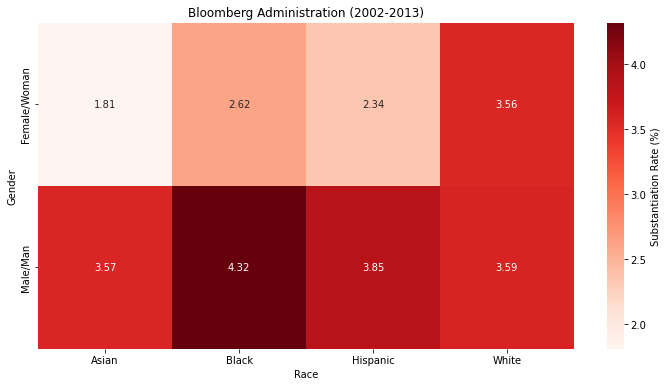

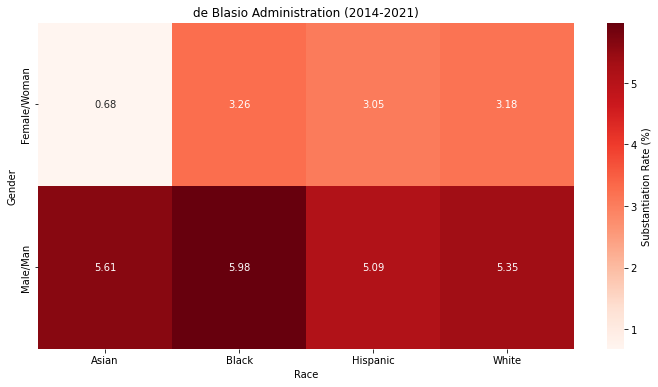

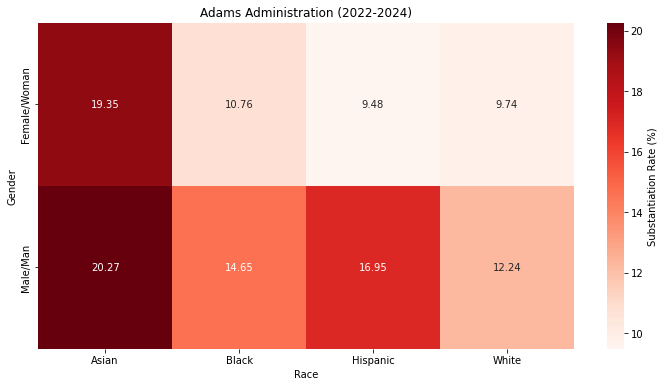

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

def analyze_period(ccrb_data, start_date, end_date, mayor):
    period_data = ccrb_data[(ccrb_data['Close Date'] >= start_date) & 
                           (ccrb_data['Close Date'] <= end_date)]
    
    substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                          'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                          'Substantiated (Formal Training)']
    race_categories = ['Hispanic', 'Black', 'White', 'Asian']
    gender_categories = ['Male/Man', 'Female/Woman']
    
    data_list = []
    
    for race in race_categories:
        for gender in gender_categories:
            subset = period_data[
                (period_data['Victim / Alleged Victim Race (Legacy)'] == race) &
                (period_data['Victim/Alleged Victim Gender'] == gender)
            ]
            
            total = len(subset)
            if total == 0:
                continue
                
            substantiated = subset[subset['CCRB Allegation Disposition'].isin(substantiated_forms)]
            rate = len(substantiated) / total * 100
            
            data_list.append({
                'race': race,
                'gender': gender,
                'rate': round(rate, 2),
                'total': total,
                'substantiated': len(substantiated)
            })
    
    return {
        'mayor': mayor,
        'period': {'start': start_date, 'end': end_date},
        'data': data_list
    }

# Convert dates
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], format='%m/%d/%Y %I:%M:%S %p')

# Analyze all periods
mayors = [
    ('Bloomberg', '2002-01-01', '2013-12-31'),
    ('de Blasio', '2014-01-01', '2021-12-31'),
    ('Adams', '2022-01-01', '2024-12-16')
]

json_data = [analyze_period(ccrb, start, end, mayor) for mayor, start, end in mayors]

# Export to JSON
with open('ccrb_analysis.json', 'w') as f:
    json.dump(json_data, f, indent=2)

# Still create visualizations
for data in json_data:
    plt.figure(figsize=(12, 6))
    df = pd.DataFrame(data['data'])
    heatmap_data = df.pivot(index='gender', columns='race', values='rate')
    
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='Reds',
                cbar_kws={'label': 'Substantiation Rate (%)'})
    plt.title(f"{data['mayor']} Administration ({data['period']['start'][:4]}-{data['period']['end'][:4]})")
    plt.xlabel('Race')
    plt.ylabel('Gender')
    plt.show()

In [12]:
import pandas as pd
import json

def analyze_period(ccrb_data, start_date, end_date, mayor):
    period_data = ccrb_data[(ccrb_data['Close Date'] >= start_date) & 
                           (ccrb_data['Close Date'] <= end_date)]
    
    substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                          'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                          'Substantiated (Formal Training)']
    race_categories = ['Hispanic', 'Black', 'White', 'Asian']
    gender_categories = ['Male/Man', 'Female/Woman']
    
    data_list = []
    
    for race in race_categories:
        for gender in gender_categories:
            subset = period_data[
                (period_data['Victim / Alleged Victim Race (Legacy)'] == race) &
                (period_data['Victim/Alleged Victim Gender'] == gender)
            ]
            
            total = len(subset)
            if total == 0:
                continue
                
            substantiated = subset[subset['CCRB Allegation Disposition'].isin(substantiated_forms)]
            rate = len(substantiated) / total * 100
            
            data_list.append({
                'race': race,
                'gender': gender,
                'rate': round(rate, 2),
                'total': total,
                'substantiated': len(substantiated)
            })
    
    return {
        'mayor': mayor,
        'period': {'start': start_date, 'end': end_date},
        'data': data_list
    }

# Convert dates
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], format='%m/%d/%Y %I:%M:%S %p')

# Analyze all periods
mayors = [
    ('Bloomberg', '2002-01-01', '2013-12-31'),
    ('de Blasio', '2014-01-01', '2021-12-31'),
    ('Adams', '2022-01-01', '2024-12-16')
]

json_data = [analyze_period(ccrb, start, end, mayor) for mayor, start, end in mayors]

print(json.dumps(json_data, indent=2))

[
  {
    "mayor": "Bloomberg",
    "period": {
      "start": "2002-01-01",
      "end": "2013-12-31"
    },
    "data": [
      {
        "race": "Hispanic",
        "gender": "Male/Man",
        "rate": 3.85,
        "total": 29278,
        "substantiated": 1127
      },
      {
        "race": "Hispanic",
        "gender": "Female/Woman",
        "rate": 2.34,
        "total": 8246,
        "substantiated": 193
      },
      {
        "race": "Black",
        "gender": "Male/Man",
        "rate": 4.32,
        "total": 70618,
        "substantiated": 3050
      },
      {
        "race": "Black",
        "gender": "Female/Woman",
        "rate": 2.62,
        "total": 19825,
        "substantiated": 519
      },
      {
        "race": "White",
        "gender": "Male/Man",
        "rate": 3.59,
        "total": 14977,
        "substantiated": 537
      },
      {
        "race": "White",
        "gender": "Female/Woman",
        "rate": 3.56,
        "total": 4940,
        "subst

/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

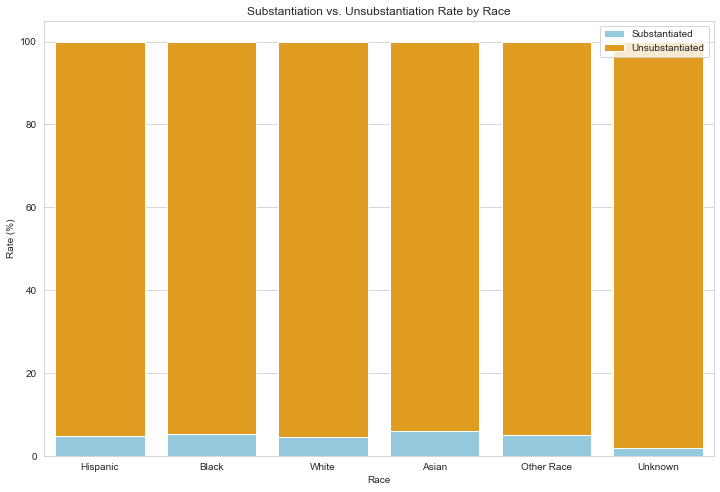

In [69]:
# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Define race categories
race_categories = ['Hispanic', 'Black', 'White', 'Asian', 'Other Race', 'Unknown']

# Create a DataFrame to store the rates for visualization
visualization_data = pd.DataFrame(columns=['Race', 'Substantiation Rate', 'Unsubstantiation Rate'])

# Calculate rates for each race category
def calculate_substantiation_rates_by_race(data, race_category):
    race_data = data[data['Victim / Alleged Victim Race (Legacy)'] == race_category]
    
    total_complaints = len(race_data)
    
    if total_complaints == 0:
        print(f"No complaints for the race category: {race_category}")
        return
    
    # Filter data for various forms of Substantiated outcomes
    substantiated_data = race_data[race_data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    substantiated_complaints = len(substantiated_data)
    
    unsubstantiated_complaints = total_complaints - substantiated_complaints

    substantiated_rate = substantiated_complaints / total_complaints * 100
    unsubstantiated_rate = unsubstantiated_complaints / total_complaints * 100

    # Store rates in the visualization DataFrame
    visualization_data.loc[len(visualization_data)] = [race_category, substantiated_rate, unsubstantiated_rate]

# Calculate rates for each race category
for race_category in race_categories:
    calculate_substantiation_rates_by_race(ccrb1, race_category)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Race', y='Substantiation Rate', data=visualization_data, color='skyblue', label='Substantiated')
sns.barplot(x='Race', y='Unsubstantiation Rate', data=visualization_data, color='orange', label='Unsubstantiated', bottom=visualization_data['Substantiation Rate'])
plt.title('Substantiation vs. Unsubstantiation Rate by Race')
plt.ylabel('Rate (%)')
plt.xlabel('Race')
plt.legend()
plt.show()

/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

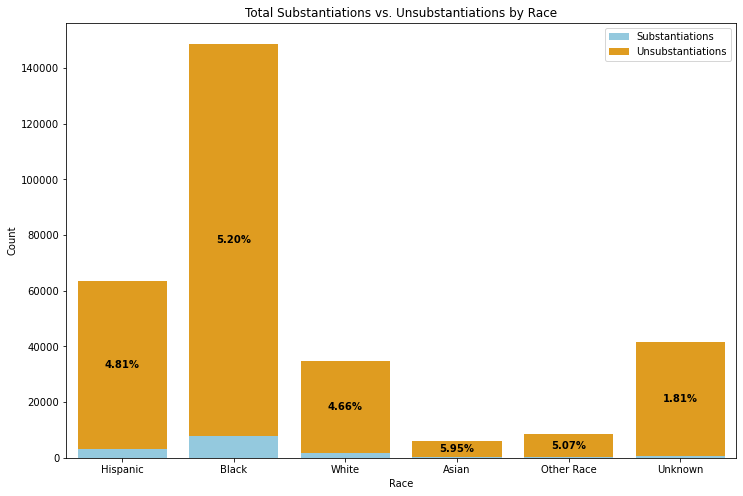

In [23]:
# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Define race categories
race_categories = ['Hispanic', 'Black', 'White', 'Asian', 'Other Race', 'Unknown']

# Create a DataFrame to store the rates for visualization
visualization_data = pd.DataFrame(columns=['Race', 'Substantiations', 'Unsubstantiations', 'Substantiation Rate'])

# Calculate rates for each race category
def calculate_substantiation_rates_by_race(data, race_category):
    race_data = data[data['Victim / Alleged Victim Race (Legacy)'] == race_category]
    
    total_complaints = len(race_data)
    
    if total_complaints == 0:
        print(f"No complaints for the race category: {race_category}")
        return
    
    # Filter data for various forms of Substantiated outcomes
    substantiated_data = race_data[race_data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    substantiated_complaints = len(substantiated_data)
    
    unsubstantiated_complaints = total_complaints - substantiated_complaints

    substantiation_rate = substantiated_complaints / total_complaints * 100

    # Store rates in the visualization DataFrame
    visualization_data.loc[len(visualization_data)] = [race_category, substantiated_complaints, unsubstantiated_complaints, substantiation_rate]

# Calculate rates for each race category
for race_category in race_categories:
    calculate_substantiation_rates_by_race(ccrb1, race_category)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Race', y='Substantiations', data=visualization_data, color='skyblue', label='Substantiations')
sns.barplot(x='Race', y='Unsubstantiations', data=visualization_data, color='orange', label='Unsubstantiations', bottom=visualization_data['Substantiations'])
plt.title('Total Substantiations vs. Unsubstantiations by Race')
plt.ylabel('Count')
plt.xlabel('Race')

# Add labels for substantiation rate
for index, row in visualization_data.iterrows():
    plt.text(index, row['Substantiations'] + row['Unsubstantiations'] / 2, f'{row["Substantiation Rate"]:.2f}%', ha='center', va='center', color='black', fontweight='bold')

plt.legend()
plt.show()

/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

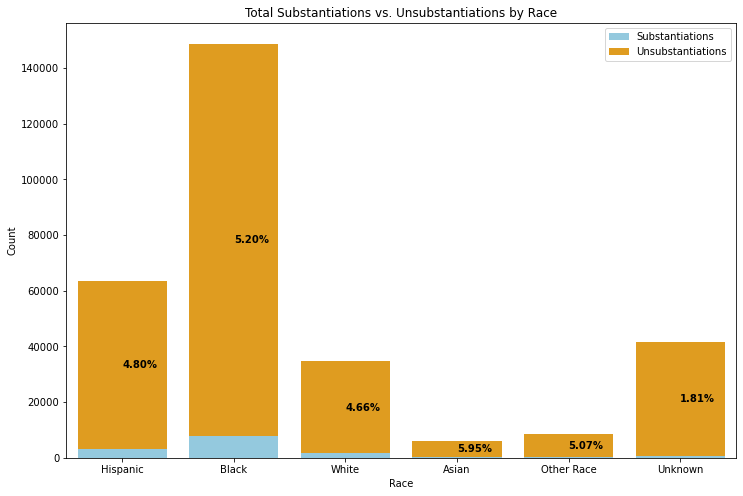

In [12]:
# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Define race categories
race_categories = ['Hispanic', 'Black', 'White', 'Asian', 'Other Race', 'Unknown']

# Create a DataFrame to store the rates for visualization
visualization_data = pd.DataFrame(columns=['Race', 'Substantiations', 'Unsubstantiations', 'Substantiation Rate'])

# Calculate rates for each race category
def calculate_substantiation_rates_by_race(data, race_category):
    race_data = data[data['Victim / Alleged Victim Race (Legacy)'] == race_category]
    
    total_complaints = len(race_data)
    
    if total_complaints == 0:
        print(f"No complaints for the race category: {race_category}")
        return
    
    # Filter data for various forms of Substantiated outcomes
    substantiated_data = race_data[race_data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    substantiated_complaints = len(substantiated_data)
    
    unsubstantiated_complaints = total_complaints - substantiated_complaints

    substantiation_rate = substantiated_complaints / total_complaints * 100

    # Store rates in the visualization DataFrame
    visualization_data.loc[len(visualization_data)] = [race_category, substantiated_complaints, unsubstantiated_complaints, substantiation_rate]

# Calculate rates for each race category
for race_category in race_categories:
    calculate_substantiation_rates_by_race(ccrb1, race_category)

# Visualization
plt.figure(figsize=(12, 8))
bars = sns.barplot(x='Race', y='Substantiations', data=visualization_data, color='skyblue', label='Substantiations')
sns.barplot(x='Race', y='Unsubstantiations', data=visualization_data, color='orange', label='Unsubstantiations', bottom=visualization_data['Substantiations'])
plt.title('Total Substantiations vs. Unsubstantiations by Race')
plt.ylabel('Count')
plt.xlabel('Race')

# Add labels for substantiation rate off to the side
for index, row in visualization_data.iterrows():
    plt.text(index, row['Substantiations'] + row['Unsubstantiations'] / 2, f'{row["Substantiation Rate"]:.2f}%', ha='left', va='center', color='black', fontweight='bold')

plt.legend()
plt.show()

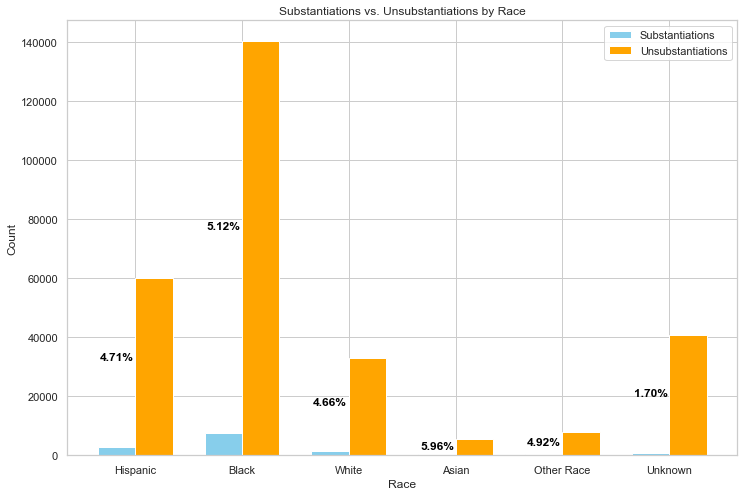

In [108]:
# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Define race categories
race_categories = ['Hispanic', 'Black', 'White', 'Asian', 'Other Race', 'Unknown']

# Create a DataFrame to store the rates for visualization
visualization_data = pd.DataFrame(columns=['Race', 'Substantiations', 'Unsubstantiations', 'Substantiation Rate'])

# Calculate rates for each race category
def calculate_substantiation_rates_by_race(data, race_category):
    race_data = data[data['Victim / Alleged Victim Race (Legacy)'] == race_category]
    
    total_complaints = len(race_data)
    
    if total_complaints == 0:
        print(f"No complaints for the race category: {race_category}")
        return
    
    # Filter data for various forms of Substantiated outcomes
    substantiated_data = race_data[race_data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    substantiated_complaints = len(substantiated_data)
    
    unsubstantiated_complaints = total_complaints - substantiated_complaints

    substantiation_rate = substantiated_complaints / total_complaints * 100

    # Store rates in the visualization DataFrame
    visualization_data.loc[len(visualization_data)] = [race_category, substantiated_complaints, unsubstantiated_complaints, substantiation_rate]

# Calculate rates for each race category
for race_category in race_categories:
    calculate_substantiation_rates_by_race(ccrb1, race_category)

# Visualization
plt.figure(figsize=(12, 8))
bar_width = 0.35
bar_positions = range(len(race_categories))

# Plot substantiations
plt.bar(bar_positions, visualization_data['Substantiations'], color='skyblue', width=bar_width, label='Substantiations')

# Plot unsubstantiations
plt.bar([pos + bar_width for pos in bar_positions], visualization_data['Unsubstantiations'], color='orange', width=bar_width, label='Unsubstantiations')

# Add data labels
for pos, (race_category, substantiations, unsubstantiations, substantiation_rate) in enumerate(zip(visualization_data['Race'], visualization_data['Substantiations'], visualization_data['Unsubstantiations'], visualization_data['Substantiation Rate'])):
    plt.text(pos, substantiations + unsubstantiations / 2, f'{substantiation_rate:.2f}%', ha='center', va='center', color='black', fontweight='bold')

plt.title('Substantiations vs. Unsubstantiations by Race')
plt.ylabel('Count')
plt.xlabel('Race')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], race_categories)
plt.legend()
plt.show()

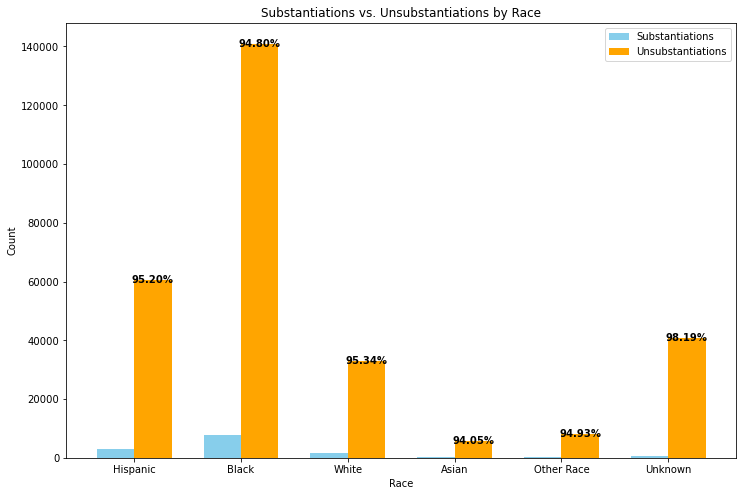

In [13]:
# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Define race categories
race_categories = ['Hispanic', 'Black', 'White', 'Asian', 'Other Race', 'Unknown']

# Create a DataFrame to store the rates for visualization
visualization_data = pd.DataFrame(columns=['Race', 'Substantiations', 'Unsubstantiations', 'Unsubstantiation Rate'])

# Calculate rates for each race category
def calculate_substantiation_rates_by_race(data, race_category):
    race_data = data[data['Victim / Alleged Victim Race (Legacy)'] == race_category]
    
    total_complaints = len(race_data)
    
    if total_complaints == 0:
        print(f"No complaints for the race category: {race_category}")
        return
    
    # Filter data for various forms of Substantiated outcomes
    substantiated_data = race_data[race_data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    substantiated_complaints = len(substantiated_data)
    
    unsubstantiated_complaints = total_complaints - substantiated_complaints

    unsubstantiation_rate = unsubstantiated_complaints / total_complaints * 100

    # Store rates in the visualization DataFrame
    visualization_data.loc[len(visualization_data)] = [race_category, substantiated_complaints, unsubstantiated_complaints, unsubstantiation_rate]

# Calculate rates for each race category
for race_category in race_categories:
    calculate_substantiation_rates_by_race(ccrb1, race_category)

# Visualization
plt.figure(figsize=(12, 8))
bar_width = 0.35
bar_positions = range(len(race_categories))

# Plot substantiations
plt.bar(bar_positions, visualization_data['Substantiations'], color='skyblue', width=bar_width, label='Substantiations')

# Plot unsubstantiations
plt.bar([pos + bar_width for pos in bar_positions], visualization_data['Unsubstantiations'], color='orange', width=bar_width, label='Unsubstantiations')

# Add data labels
for pos, (race_category, substantiations, unsubstantiations, unsubstantiation_rate) in enumerate(zip(visualization_data['Race'], visualization_data['Substantiations'], visualization_data['Unsubstantiations'], visualization_data['Unsubstantiation Rate'])):
    plt.text(pos + bar_width, unsubstantiations + 0.5, f'{unsubstantiation_rate:.2f}%', ha='center', va='center', color='black', fontweight='bold')

plt.title('Substantiations vs. Unsubstantiations by Race')
plt.ylabel('Count')
plt.xlabel('Race')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], race_categories)
plt.legend()
plt.show()

No complaints for the gender category: NA


/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


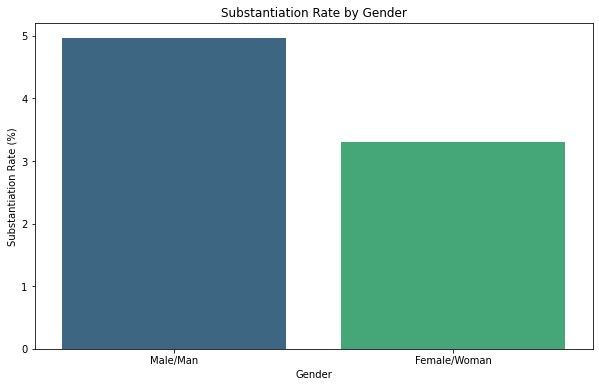

In [14]:
# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Define gender categories
gender_categories = ['Male/Man', 'Female/Woman', 'NA']

# Create a DataFrame to store the rates for visualization
visualization_data = pd.DataFrame(columns=['Gender', 'Substantiation Rate'])

# Calculate rates for each gender category
for gender_category in gender_categories:
    gender_data = ccrb1[ccrb1['Victim/Alleged Victim Gender'] == gender_category]
    
    total_complaints = len(gender_data)
    
    if total_complaints == 0:
        print(f"No complaints for the gender category: {gender_category}")
        continue
    
    # Filter data for various forms of Substantiated outcomes
    substantiated_data = gender_data[gender_data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    substantiation_rate = len(substantiated_data) / total_complaints * 100

    # Store rates in the visualization DataFrame
    visualization_data.loc[len(visualization_data)] = [gender_category, substantiation_rate]

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Substantiation Rate', data=visualization_data, palette='viridis')
plt.title('Substantiation Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Substantiation Rate (%)')
plt.show()

In [15]:
# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Define gender categories
gender_categories = ['Male/Man', 'Female/Woman', 'NA']

# Calculate rates for each gender category
def calculate_substantiation_rates_by_gender(data, gender_category):
    gender_data = data[data['Victim/Alleged Victim Gender'] == gender_category]
    
    total_complaints = len(gender_data)
    
    if total_complaints == 0:
        print(f"No complaints for the gender category: {gender_category}")
        return
    
    # Filter data for various forms of Substantiated outcomes
    substantiated_data = gender_data[gender_data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    substantiated_complaints = len(substantiated_data)
    
    unsubstantiated_complaints = total_complaints - substantiated_complaints

    substantiated_rate = substantiated_complaints / total_complaints * 100
    unsubstantiated_rate = unsubstantiated_complaints / total_complaints * 100

    print(f"Rates for gender category: {gender_category}")
    print(f"Total Complaints: {total_complaints}")
    print(f"Substantiated Rate: {substantiated_rate:.2f}%")
    print(f"Unsubstantiated Rate: {unsubstantiated_rate:.2f}%")
    print()

# Calculate rates for each gender category
for gender_category in gender_categories:
    calculate_substantiation_rates_by_gender(ccrb1, gender_category)

Rates for gender category: Male/Man
Total Complaints: 256022
Substantiated Rate: 4.96%
Unsubstantiated Rate: 95.04%

Rates for gender category: Female/Woman
Total Complaints: 82336
Substantiated Rate: 3.31%
Unsubstantiated Rate: 96.69%

No complaints for the gender category: NA


/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

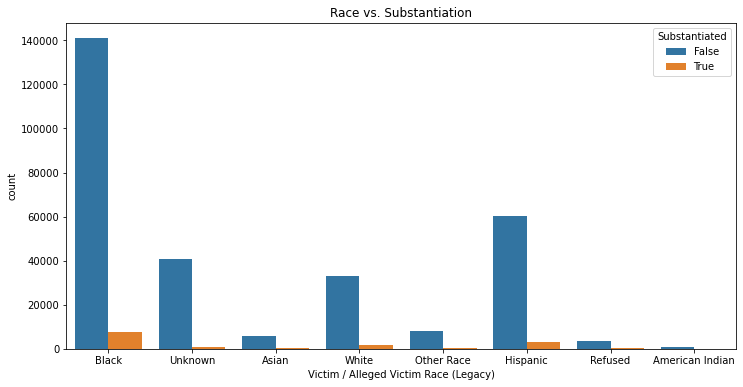

In [16]:
# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Define race categories
race_categories = ['Hispanic', 'Black', 'White', 'Asian', 'Other Race', 'Unknown']

# Create a new column for Substantiated/Unsubstantiated
ccrb1['Substantiated'] = ccrb1['CCRB Allegation Disposition'].isin(substantiated_forms)

# Plot the race vs. substantiation
plt.figure(figsize=(12, 6))
sns.countplot(x='Victim / Alleged Victim Race (Legacy)', hue='Substantiated', data=ccrb1)
plt.title('Race vs. Substantiation')
plt.show()

/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

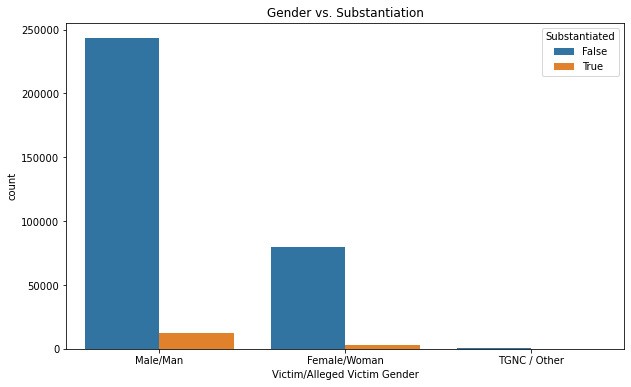

In [17]:
# Define gender categories
gender_categories = ['Male/Man', 'Female/Woman', 'NA']

# Create a new column for Substantiated/Unsubstantiated
ccrb1['Substantiated'] = ccrb1['CCRB Allegation Disposition'].isin(substantiated_forms)

# Plot the gender vs. substantiation
plt.figure(figsize=(10, 6))
sns.countplot(x='Victim/Alleged Victim Gender', hue='Substantiated', data=ccrb1)
plt.title('Gender vs. Substantiation')
plt.show()

Chokehold Substantiation Rate Before Eric Garner Incident: 0.01%
Chokehold Substantiation Rate After Eric Garner Incident: 0.07%


/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) in

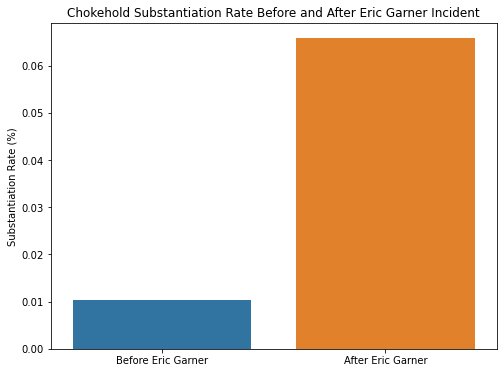

In [18]:
# Convert the 'Close Date' column to datetime format and strip out the timestamp
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

# Define the allegation of interest
allegation_of_interest = 'Chokehold'

# Define the date of the Eric Garner incident
eric_garner_incident_date = pd.to_datetime('2014-07-17').date()

# Split data into before and after Eric Garner incident
before_garner_data = ccrb[ccrb['Close Date'] < eric_garner_incident_date]
after_garner_data = ccrb[ccrb['Close Date'] >= eric_garner_incident_date]

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Calculate rates for the period before the Eric Garner incident
before_garner_substantiation_rate = len(before_garner_data[(before_garner_data['Allegation'] == allegation_of_interest) &
                                                           (before_garner_data['CCRB Allegation Disposition'].isin(substantiated_forms))]) / len(before_garner_data) * 100

# Calculate rates for the period after the Eric Garner incident
after_garner_substantiation_rate = len(after_garner_data[(after_garner_data['Allegation'] == allegation_of_interest) &
                                                         (after_garner_data['CCRB Allegation Disposition'].isin(substantiated_forms))]) / len(after_garner_data) * 100

# Print the rates
print(f"Chokehold Substantiation Rate Before Eric Garner Incident: {before_garner_substantiation_rate:.2f}%")
print(f"Chokehold Substantiation Rate After Eric Garner Incident: {after_garner_substantiation_rate:.2f}%")

# Create a Seaborn visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Eric Garner', 'After Eric Garner'], y=[before_garner_substantiation_rate, after_garner_substantiation_rate])
plt.title('Chokehold Substantiation Rate Before and After Eric Garner Incident')
plt.ylabel('Substantiation Rate (%)')
plt.show()

Bloomberg Administration:
Total Complaints: 218933
Substantiated Rate: 2.97%
Unsubstantiated Rate: 97.03%



/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) in

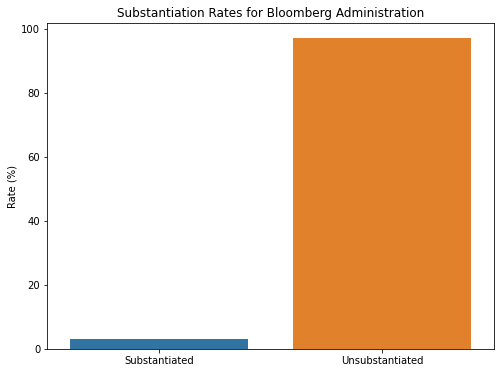

de Blasio Administration:
Total Complaints: 102913
Substantiated Rate: 4.29%
Unsubstantiated Rate: 95.71%



/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) in

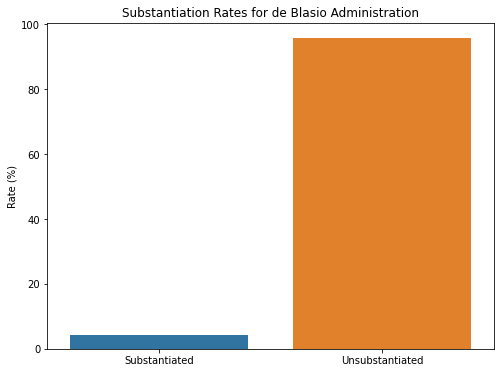

Adams Administration:
Total Complaints: 38373
Substantiated Rate: 11.66%
Unsubstantiated Rate: 88.34%



/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) in

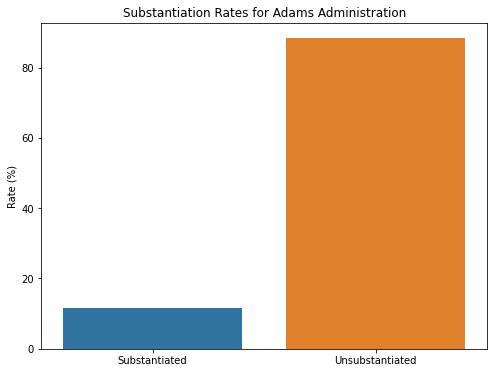

In [19]:
# Convert the 'Close Date' column to datetime format and strip out the timestamp
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

# Define date ranges for Bloomberg, de Blasio, and Adams administrations
bloomberg_start = pd.to_datetime('2002-01-01').date()
bloomberg_end = pd.to_datetime('2013-12-31').date()

deblasio_start = pd.to_datetime('2014-01-01').date()
deblasio_end = pd.to_datetime('2021-12-31').date()

adams_start = pd.to_datetime('2022-01-01').date()
adams_end = pd.to_datetime('2023-12-31').date()

# Filter data for each administration
bloomberg_data = ccrb[(ccrb['Close Date'] >= bloomberg_start) & (ccrb['Close Date'] <= bloomberg_end)]
deblasio_data = ccrb[(ccrb['Close Date'] >= deblasio_start) & (ccrb['Close Date'] <= deblasio_end)]
adams_data = ccrb[(ccrb['Close Date'] >= adams_start) & (ccrb['Close Date'] <= adams_end)]

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Calculate rates for each administration
def calculate_complaint_rates(data, administration_name):
    total_complaints = len(data)
    
    if total_complaints == 0:
        print(f"No complaints for {administration_name} Administration.")
        return
    
    # Filter data for various forms of Substantiated outcomes
    substantiated_data = data[data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    substantiated_complaints = len(substantiated_data)
    
    unsubstantiated_complaints = total_complaints - substantiated_complaints

    substantiated_rate = substantiated_complaints / total_complaints * 100
    unsubstantiated_rate = unsubstantiated_complaints / total_complaints * 100

    print(f"{administration_name} Administration:")
    print(f"Total Complaints: {total_complaints}")
    print(f"Substantiated Rate: {substantiated_rate:.2f}%")
    print(f"Unsubstantiated Rate: {unsubstantiated_rate:.2f}%")
    print()

    # Visualization
    plt.figure(figsize=(8, 6))
    sns.barplot(x=['Substantiated', 'Unsubstantiated'], y=[substantiated_rate, unsubstantiated_rate])
    plt.title(f'Substantiation Rates for {administration_name} Administration')
    plt.ylabel('Rate (%)')
    plt.show()

# Create visualizations for each administration
calculate_complaint_rates(bloomberg_data, "Bloomberg")
calculate_complaint_rates(deblasio_data, "de Blasio")
calculate_complaint_rates(adams_data, "Adams")

Bloomberg Administration:
Total Complaints: 218933
Substantiated Cases: 6506
Unsubstantiated Cases: 212427



/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) in

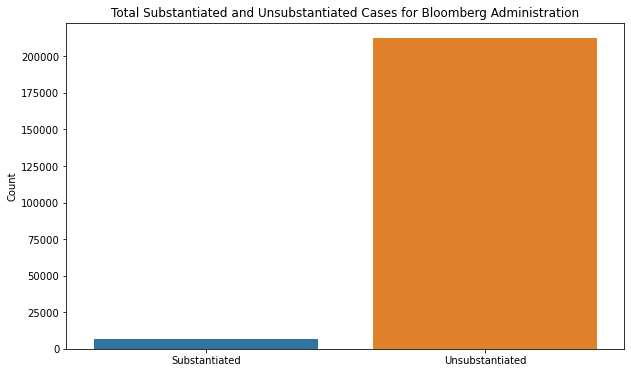

de Blasio Administration:
Total Complaints: 102913
Substantiated Cases: 4414
Unsubstantiated Cases: 98499



/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) in

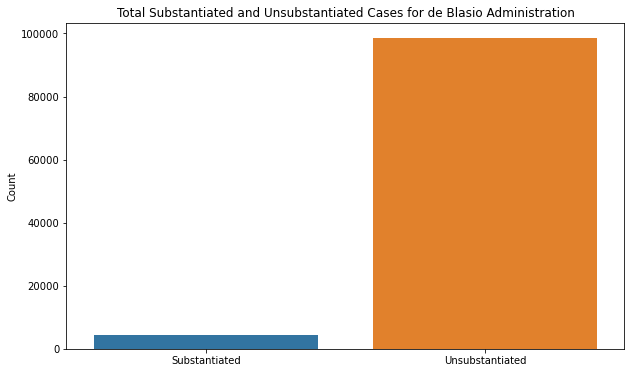

Adams Administration:
Total Complaints: 38373
Substantiated Cases: 4473
Unsubstantiated Cases: 33900



/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) in

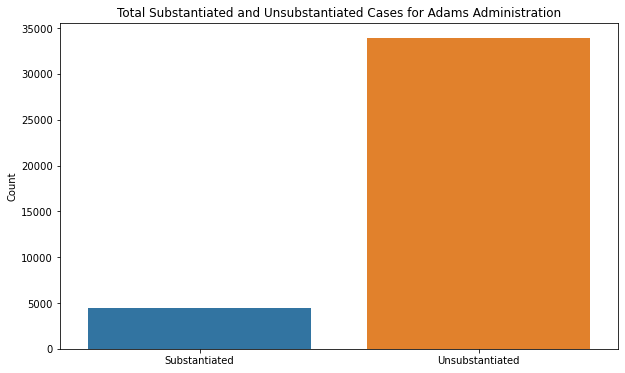

In [18]:
# Convert the 'Close Date' column to datetime format and strip out the timestamp
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

# Define date ranges for Bloomberg, de Blasio, and Adams administrations
bloomberg_start = pd.to_datetime('2002-01-01').date()
bloomberg_end = pd.to_datetime('2013-12-31').date()

deblasio_start = pd.to_datetime('2014-01-01').date()
deblasio_end = pd.to_datetime('2021-12-31').date()

adams_start = pd.to_datetime('2022-01-01').date()
adams_end = pd.to_datetime('2023-12-31').date()

# Filter data for each administration
bloomberg_data = ccrb[(ccrb['Close Date'] >= bloomberg_start) & (ccrb['Close Date'] <= bloomberg_end)]
deblasio_data = ccrb[(ccrb['Close Date'] >= deblasio_start) & (ccrb['Close Date'] <= deblasio_end)]
adams_data = ccrb[(ccrb['Close Date'] >= adams_start) & (ccrb['Close Date'] <= adams_end)]

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Calculate totals for each administration
def calculate_complaint_totals(data, administration_name):
    total_complaints = len(data)
    
    if total_complaints == 0:
        print(f"No complaints for {administration_name} Administration.")
        return
    
    # Filter data for various forms of Substantiated outcomes
    substantiated_data = data[data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    substantiated_count = len(substantiated_data)
    
    unsubstantiated_count = total_complaints - substantiated_count

    print(f"{administration_name} Administration:")
    print(f"Total Complaints: {total_complaints}")
    print(f"Substantiated Cases: {substantiated_count}")
    print(f"Unsubstantiated Cases: {unsubstantiated_count}")
    print()

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x=['Substantiated', 'Unsubstantiated'], y=[substantiated_count, unsubstantiated_count])
    plt.title(f'Total Substantiated and Unsubstantiated Cases for {administration_name} Administration')
    plt.ylabel('Count')
    plt.show()

# Create visualizations for each administration
calculate_complaint_totals(bloomberg_data, "Bloomberg")
calculate_complaint_totals(deblasio_data, "de Blasio")
calculate_complaint_totals(adams_data, "Adams")

Bloomberg Administration:
Total Complaints: 218933
Substantiated Cases: 6506
Unsubstantiated Cases: 212427



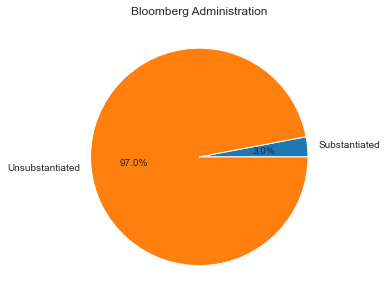

de Blasio Administration:
Total Complaints: 102913
Substantiated Cases: 4414
Unsubstantiated Cases: 98499



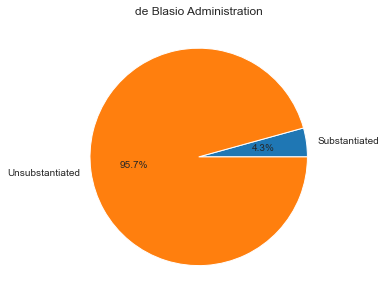

Adams Administration:
Total Complaints: 38373
Substantiated Cases: 4473
Unsubstantiated Cases: 33900



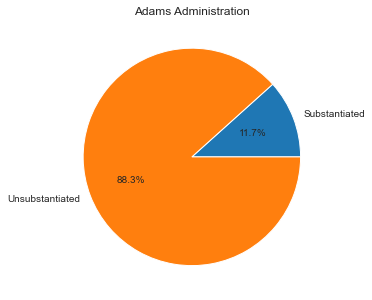

In [19]:

# Set Seaborn style to white background
sns.set_style("whitegrid")

# Assuming you have a column named 'CCRB Allegation Disposition' containing values like 'Substantiated (Charges)' or 'Unsubstantiated'
# Assuming you also have a column named 'Close Date' representing the date of the complaint in the format 'MM/DD/YYYY HH:MM:SS AM/PM'

# Convert the 'Close Date' column to datetime format and strip out the timestamp
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

# Define date ranges for Bloomberg, de Blasio, and Adams administrations
bloomberg_start = pd.to_datetime('2002-01-01').date()
bloomberg_end = pd.to_datetime('2013-12-31').date()

deblasio_start = pd.to_datetime('2014-01-01').date()
deblasio_end = pd.to_datetime('2021-12-31').date()

adams_start = pd.to_datetime('2022-01-01').date()
adams_end = pd.to_datetime('2023-12-31').date()

# Filter data for each administration
bloomberg_data = ccrb[(ccrb['Close Date'] >= bloomberg_start) & (ccrb['Close Date'] <= bloomberg_end)]
deblasio_data = ccrb[(ccrb['Close Date'] >= deblasio_start) & (ccrb['Close Date'] <= deblasio_end)]
adams_data = ccrb[(ccrb['Close Date'] >= adams_start) & (ccrb['Close Date'] <= adams_end)]

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Calculate totals for each administration
def calculate_complaint_totals(data, administration_name):
    total_complaints = len(data)
    
    if total_complaints == 0:
        print(f"No complaints for {administration_name} Administration.")
        return
    
    # Filter data for various forms of Substantiated outcomes
    substantiated_data = data[data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    substantiated_count = len(substantiated_data)
    
    unsubstantiated_count = total_complaints - substantiated_count

    print(f"{administration_name} Administration:")
    print(f"Total Complaints: {total_complaints}")
    print(f"Substantiated Cases: {substantiated_count}")
    print(f"Unsubstantiated Cases: {unsubstantiated_count}")
    print()

    # Visualization
    plt.figure(figsize=(5, 5))
    plt.pie([substantiated_count, unsubstantiated_count], labels=['Substantiated', 'Unsubstantiated'], autopct='%1.1f%%')
    plt.title(f'{administration_name} Administration')
    plt.show()

# Display individual pie charts for each administration
calculate_complaint_totals(bloomberg_data, "Bloomberg")
calculate_complaint_totals(deblasio_data, "de Blasio")
calculate_complaint_totals(adams_data, "Adams")

In [ ]:

# Convert the 'Close Date' column to datetime format and strip out the timestamp
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

# Define date ranges for Bloomberg, de Blasio, and Adams administrations
bloomberg_start = pd.to_datetime('2002-01-01').date()
bloomberg_end = pd.to_datetime('2013-12-31').date()

deblasio_start = pd.to_datetime('2014-01-01').date()
deblasio_end = pd.to_datetime('2021-12-31').date()

adams_start = pd.to_datetime('2022-01-01').date()
adams_end = pd.to_datetime('2024-12-16').date()

# Filter data for each administration
bloomberg_data = ccrb[(ccrb['Close Date'] >= bloomberg_start) & (ccrb['Close Date'] <= bloomberg_end)]
deblasio_data = ccrb[(ccrb['Close Date'] >= deblasio_start) & (ccrb['Close Date'] <= deblasio_end)]
adams_data = ccrb[(ccrb['Close Date'] >= adams_start) & (ccrb['Close Date'] <= adams_end)]

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Define specific values in the "FADO Type" column
fado_types_of_interest = ['Force', 'Abuse of Authority', 'Discourtesy', 'Offensive Language']

# Calculate rates for each administration and FADO Type
def calculate_fado_type_rates(data, administration_name):
    print(f"{administration_name} Administration:")
    
    for fado_type in fado_types_of_interest:
        type_data = data[data['FADO Type'] == fado_type]
        
        total_complaints = len(type_data)
        
        if total_complaints == 0:
            print(f"No complaints for {fado_type}.")
            continue

        # Filter data for various forms of Substantiated outcomes
        substantiated_data = type_data[type_data['CCRB Allegation Disposition'].isin(substantiated_forms)]
        substantiated_count = len(substantiated_data)
        
        unsubstantiated_count = total_complaints - substantiated_count

        substantiated_rate = substantiated_count / total_complaints * 100
        unsubstantiated_rate = unsubstantiated_count / total_complaints * 100

        print(f"{fado_type}:")
        print(f"Total Complaints: {total_complaints}")
        print(f"Substantiated Rate: {substantiated_rate:.2f}%")
        print(f"Unsubstantiated Rate: {unsubstantiated_rate:.2f}%")
        print()

# Display rates for each FADO Type in each administration
calculate_fado_type_rates(bloomberg_data, "Bloomberg")
calculate_fado_type_rates(deblasio_data, "de Blasio")
calculate_fado_type_rates(adams_data, "Adams")

Bloomberg Administration:
Force:
Total Complaints: 67494
Substantiated Rate: 1.13%
Unsubstantiated Rate: 98.87%

Abuse of Authority:
Total Complaints: 104933
Substantiated Rate: 4.61%
Unsubstantiated Rate: 95.39%

Discourtesy:
Total Complaints: 37320
Substantiated Rate: 2.14%
Unsubstantiated Rate: 97.86%

Offensive Language:
Total Complaints: 6209
Substantiated Rate: 1.76%
Unsubstantiated Rate: 98.24%

de Blasio Administration:
Force:
Total Complaints: 27371
Substantiated Rate: 2.52%
Unsubstantiated Rate: 97.48%

Abuse of Authority:
Total Complaints: 56129
Substantiated Rate: 5.43%
Unsubstantiated Rate: 94.57%

Discourtesy:
Total Complaints: 13070
Substantiated Rate: 4.10%
Unsubstantiated Rate: 95.90%

Offensive Language:
Total Complaints: 2873
Substantiated Rate: 3.97%
Unsubstantiated Rate: 96.03%

Adams Administration:
Force:
Total Complaints: 10415
Substantiated Rate: 4.75%
Unsubstantiated Rate: 95.25%

Abuse of Authority:
Total Complaints: 22704
Substantiated Rate: 12.68%
Unsubstan

/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

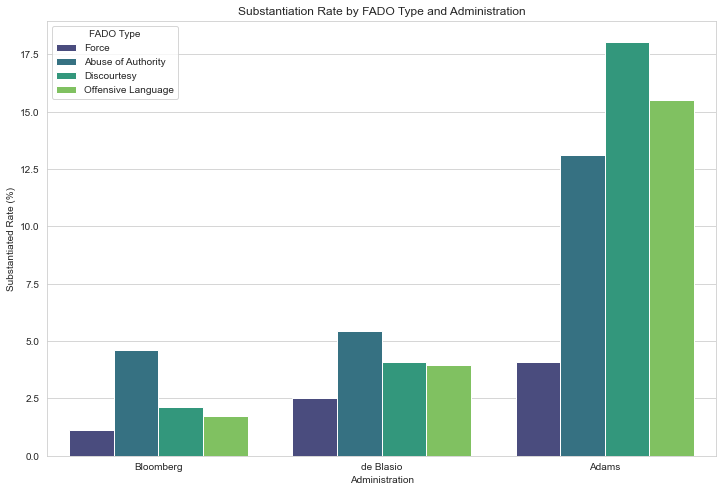

In [47]:

# Convert the 'Close Date' column to datetime format and strip out the timestamp
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

# Define date ranges for Bloomberg, de Blasio, and Adams administrations
bloomberg_start = pd.to_datetime('2002-01-01').date()
bloomberg_end = pd.to_datetime('2013-12-31').date()

deblasio_start = pd.to_datetime('2014-01-01').date()
deblasio_end = pd.to_datetime('2021-12-31').date()

adams_start = pd.to_datetime('2022-01-01').date()
adams_end = pd.to_datetime('2024-12-16').date()

# Filter data for each administration
bloomberg_data = ccrb[(ccrb['Close Date'] >= bloomberg_start) & (ccrb['Close Date'] <= bloomberg_end)]
deblasio_data = ccrb[(ccrb['Close Date'] >= deblasio_start) & (ccrb['Close Date'] <= deblasio_end)]
adams_data = ccrb[(ccrb['Close Date'] >= adams_start) & (ccrb['Close Date'] <= adams_end)]

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Define specific values in the "FADO Type" column
fado_types_of_interest = ['Force', 'Abuse of Authority', 'Discourtesy', 'Offensive Language']

# Create a DataFrame to store the rates for visualization
visualization_data = pd.DataFrame(columns=['Administration', 'FADO Type', 'Substantiated Rate', 'Unsubstantiated Rate'])

# Calculate rates for each administration and FADO Type
def calculate_fado_type_rates(data, administration_name):
    for fado_type in fado_types_of_interest:
        type_data = data[data['FADO Type'] == fado_type]
        
        total_complaints = len(type_data)
        
        if total_complaints == 0:
            continue

        # Filter data for various forms of Substantiated outcomes
        substantiated_data = type_data[type_data['CCRB Allegation Disposition'].isin(substantiated_forms)]
        substantiated_count = len(substantiated_data)
        
        unsubstantiated_count = total_complaints - substantiated_count

        substantiated_rate = substantiated_count / total_complaints * 100
        unsubstantiated_rate = unsubstantiated_count / total_complaints * 100

        # Store rates in the visualization DataFrame
        visualization_data.loc[len(visualization_data)] = [administration_name, fado_type, substantiated_rate, unsubstantiated_rate]

# Display rates for each FADO Type in each administration
calculate_fado_type_rates(bloomberg_data, "Bloomberg")
calculate_fado_type_rates(deblasio_data, "de Blasio")
calculate_fado_type_rates(adams_data, "Adams")

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Administration', y='Substantiated Rate', hue='FADO Type', data=visualization_data, palette='viridis')
plt.title('Substantiation Rate by FADO Type and Administration')
plt.ylabel('Substantiated Rate (%)')
plt.xlabel('Administration')
plt.show()

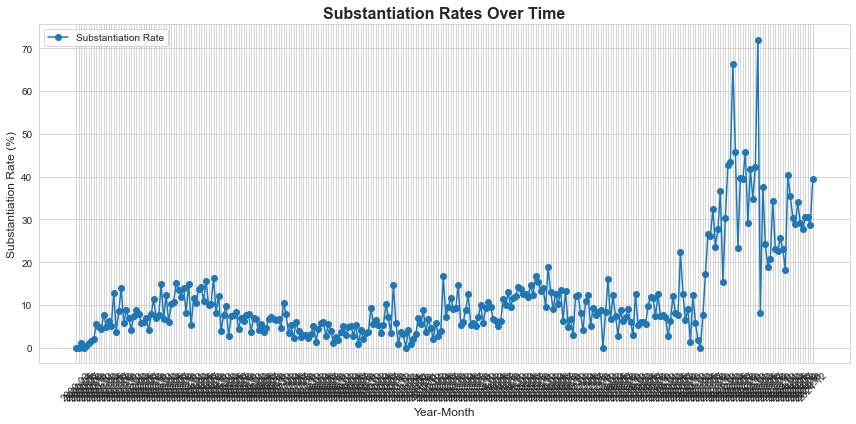

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Close Date' to datetime format
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], errors='coerce')

# Create a column for Year-Month based on 'Close Date'
ccrb['YearMonth'] = ccrb['Close Date'].dt.to_period('M')

# Define substantiated complaint categories
substantiated_outcomes = [
    'Substantiated (Charges)', 'Substantiated (Command Discipline A)',
    'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
    'Substantiated (Formal Training)'
]

# Classify complaints as substantiated or unsubstantiated
ccrb['IsSubstantiated'] = ccrb['CCRB Complaint Disposition'].apply(
    lambda x: 1 if x in substantiated_outcomes else 0
)

# Group by Year-Month and calculate total and substantiated complaints
monthly_data = ccrb.groupby('YearMonth').agg(
    total_complaints=('Complaint Id', 'count'),
    substantiated_complaints=('IsSubstantiated', 'sum')
).reset_index()

# Calculate substantiation rate as a percentage
monthly_data['substantiation_rate'] = (monthly_data['substantiated_complaints'] / monthly_data['total_complaints']) * 100

# Plotting the substantiation rate over time
plt.figure(figsize=(12, 6))

# Ensure correct plotting by converting to numpy arrays
plt.plot(monthly_data['YearMonth'].astype(str).values, monthly_data['substantiation_rate'].values, marker='o', label='Substantiation Rate')

# Enhancing the chart
plt.title('Substantiation Rates Over Time', fontsize=16, weight='bold')
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Substantiation Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.legend()
plt.show()





/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


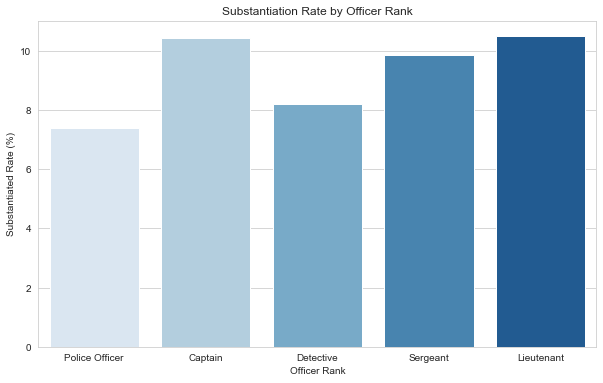

In [58]:

# Define specific values in the "Officer Rank At Incident" column
officer_ranks_of_interest = ['Police Officer', 'Captain', 'Detective', 'Sergeant', 'Lieutenant']

# Create a DataFrame to store the rates for visualization
visualization_data = pd.DataFrame(columns=['Officer Rank', 'Substantiated Rate', 'Unsubstantiated Rate'])

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Calculate rates for each officer rank
def calculate_officer_rank_rates(data):
    for officer_rank in officer_ranks_of_interest:
        rank_data = data[data['Officer Rank At Incident'] == officer_rank]
        
        total_complaints = len(rank_data)
        
        if total_complaints == 0:
            continue

        # Filter data for various forms of Substantiated outcomes
        substantiated_data = rank_data[rank_data['CCRB Allegation Disposition'].isin(substantiated_forms)]
        substantiated_count = len(substantiated_data)
        
        unsubstantiated_count = total_complaints - substantiated_count

        substantiated_rate = substantiated_count / total_complaints * 100
        unsubstantiated_rate = unsubstantiated_count / total_complaints * 100

        # Store rates in the visualization DataFrame
        visualization_data.loc[len(visualization_data)] = [officer_rank, substantiated_rate, unsubstantiated_rate]

# Display rates for each officer rank
calculate_officer_rank_rates(ccrb)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Officer Rank', y='Substantiated Rate', data=visualization_data, palette='Blues')
plt.title('Substantiation Rate by Officer Rank')
plt.ylabel('Substantiated Rate (%)')
plt.xlabel('Officer Rank')
plt.show()

/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

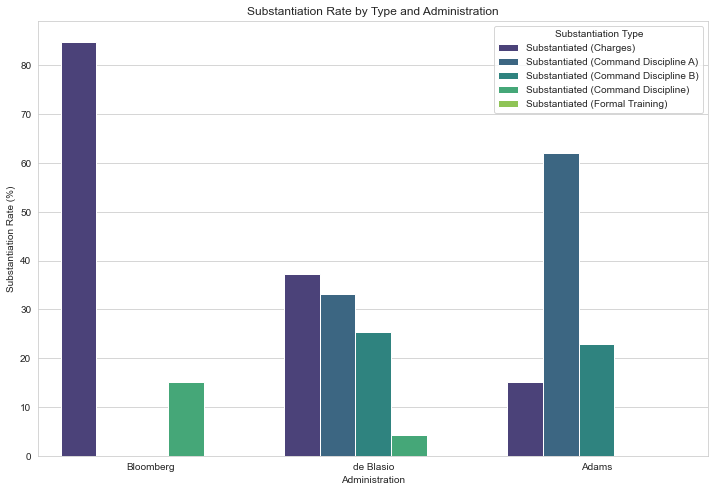

In [22]:
# Convert the 'Close Date' column to datetime format and strip out the timestamp
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

# Define date ranges for Bloomberg, de Blasio, and Adams administrations
bloomberg_start = pd.to_datetime('2002-01-01').date()
bloomberg_end = pd.to_datetime('2013-12-31').date()

deblasio_start = pd.to_datetime('2014-01-01').date()
deblasio_end = pd.to_datetime('2021-12-31').date()

adams_start = pd.to_datetime('2022-01-01').date()
adams_end = pd.to_datetime('2023-12-31').date()

# Filter data for each administration
bloomberg_data = ccrb[(ccrb['Close Date'] >= bloomberg_start) & (ccrb['Close Date'] <= bloomberg_end)]
deblasio_data = ccrb[(ccrb['Close Date'] >= deblasio_start) & (ccrb['Close Date'] <= deblasio_end)]
adams_data = ccrb[(ccrb['Close Date'] >= adams_start) & (ccrb['Close Date'] <= adams_end)]

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Create a DataFrame to store the rates for visualization
visualization_data = pd.DataFrame(columns=['Administration'] + substantiated_forms)

# Calculate rates for each administration
def calculate_substantiation_rates(data, administration_name):
    administration_data = data[data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    
    total_complaints = len(administration_data)
    
    if total_complaints == 0:
        print(f"No complaints for {administration_name} Administration.")
        return
    
    # Calculate rates for each form of Substantiated outcome
    rates = []
    for form in substantiated_forms:
        form_data = administration_data[administration_data['CCRB Allegation Disposition'] == form]
        form_count = len(form_data)
        
        rate = form_count / total_complaints * 100
        rates.append(rate)

    # Store rates in the visualization DataFrame
    visualization_data.loc[len(visualization_data)] = [administration_name] + rates

# Display rates for each administration
calculate_substantiation_rates(bloomberg_data, "Bloomberg")
calculate_substantiation_rates(deblasio_data, "de Blasio")
calculate_substantiation_rates(adams_data, "Adams")

# Visualization
plt.figure(figsize=(12, 8))
visualization_data = visualization_data.melt(id_vars='Administration', var_name='Substantiation Type', value_name='Substantiation Rate')
sns.barplot(x='Administration', y='Substantiation Rate', hue='Substantiation Type', data=visualization_data, palette='viridis')
plt.title('Substantiation Rate by Type and Administration')
plt.ylabel('Substantiation Rate (%)')
plt.xlabel('Administration')
plt.show()

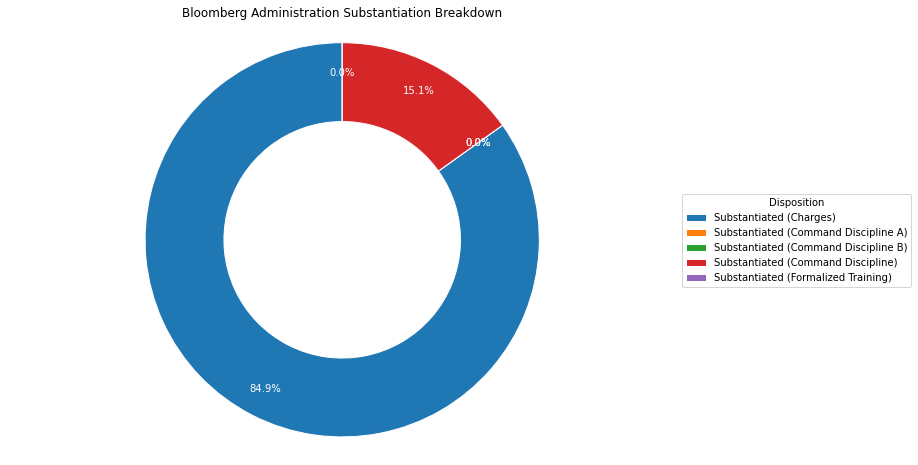

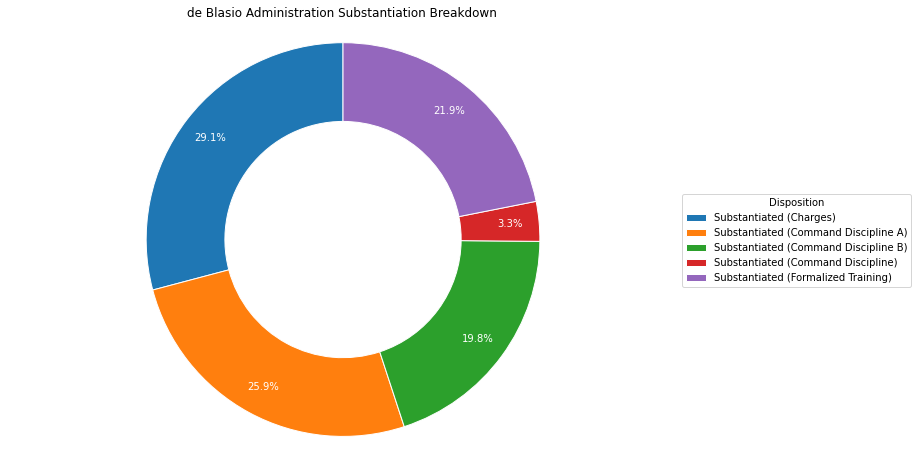

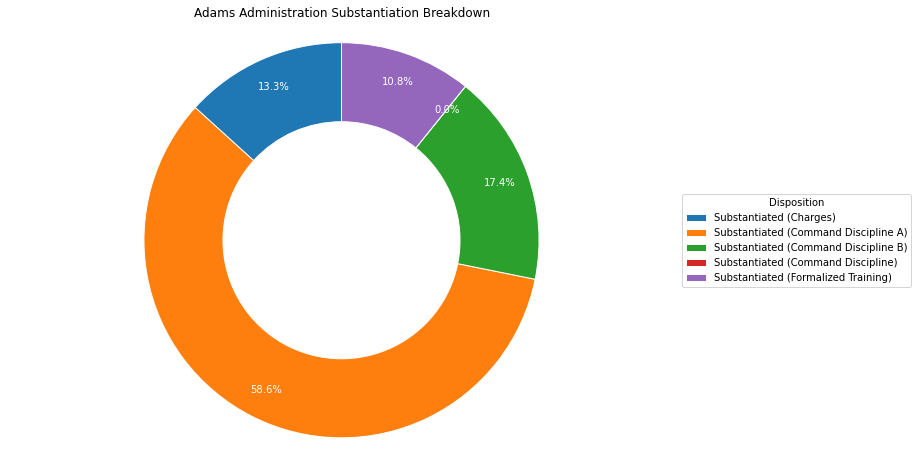


Bloomberg Administration:
  Substantiated (Charges): 84.88% (5522 cases)
  Substantiated (Command Discipline A): 0.00% (0 cases)
  Substantiated (Command Discipline B): 0.00% (0 cases)
  Substantiated (Command Discipline): 15.12% (984 cases)
  Substantiated (Formalized Training): 0.00% (0 cases)

de Blasio Administration:
  Substantiated (Charges): 29.13% (1646 cases)
  Substantiated (Command Discipline A): 25.91% (1464 cases)
  Substantiated (Command Discipline B): 19.82% (1120 cases)
  Substantiated (Command Discipline): 3.26% (184 cases)
  Substantiated (Formalized Training): 21.89% (1237 cases)

Adams Administration:
  Substantiated (Charges): 13.28% (1067 cases)
  Substantiated (Command Discipline A): 58.56% (4705 cases)
  Substantiated (Command Discipline B): 17.37% (1396 cases)
  Substantiated (Command Discipline): 0.00% (0 cases)
  Substantiated (Formalized Training): 10.79% (867 cases)


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Close Date' column to datetime format and strip out the timestamp
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

# Define date ranges for Bloomberg, de Blasio, and Adams administrations
bloomberg_start = pd.to_datetime('2002-01-01').date()
bloomberg_end = pd.to_datetime('2013-12-31').date()

deblasio_start = pd.to_datetime('2014-01-01').date()
deblasio_end = pd.to_datetime('2021-12-31').date()

adams_start = pd.to_datetime('2022-01-01').date()
adams_end = pd.to_datetime('2024-12-16').date()

# Filter data for each administration
bloomberg_data = ccrb[(ccrb['Close Date'] >= bloomberg_start) & (ccrb['Close Date'] <= bloomberg_end)]
deblasio_data = ccrb[(ccrb['Close Date'] >= deblasio_start) & (ccrb['Close Date'] <= deblasio_end)]
adams_data = ccrb[(ccrb['Close Date'] >= adams_start) & (ccrb['Close Date'] <= adams_end)]

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formalized Training)']

# Initialize a dictionary to store results for all administrations
results = {}

# Function to calculate substantiation breakdown
def calculate_substantiation_breakdown(data, administration_name):
    administration_data = data[data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    total_substantiated = len(administration_data)
    
    if total_substantiated == 0:
        print(f"No substantiated complaints for {administration_name} Administration.")
        results[administration_name] = []
        return
    
    # Calculate the percentage of each discipline type within substantiated cases
    breakdown = []
    for form in substantiated_forms:
        form_data = administration_data[administration_data['CCRB Allegation Disposition'] == form]
        form_count = len(form_data)
        
        percentage = form_count / total_substantiated * 100
        breakdown.append({
            'Disposition': form,
            'Percentage': f"{percentage:.2f}%",
            'Count': form_count
        })
    
    # Add breakdown to results
    results[administration_name] = breakdown

    # Plot pie chart with percentages
    percentages = [item['Percentage'] for item in breakdown]
    labels = [item['Disposition'] for item in breakdown]
    values = [item['Count'] for item in breakdown]
    
    plt.figure(figsize=(12, 8))
    wedges, texts, autotexts = plt.pie(values, startangle=90, pctdistance=0.85,
                                       wedgeprops=dict(width=0.4, edgecolor='w'), autopct='%1.1f%%')
    plt.title(f"{administration_name} Administration Substantiation Breakdown")

    # Add legend outside the pie chart to prevent label overlap
    plt.legend(wedges, labels, title="Disposition", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Add percentage values onto the chart
    for autotext in autotexts:
        autotext.set_color('white')
    
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Calculate breakdown for each administration
calculate_substantiation_breakdown(bloomberg_data, "Bloomberg")
calculate_substantiation_breakdown(deblasio_data, "de Blasio")
calculate_substantiation_breakdown(adams_data, "Adams")

# Print the results as a list
for admin, breakdown in results.items():
    print(f"\n{admin} Administration:")
    for item in breakdown:
        print(f"  {item['Disposition']}: {item['Percentage']} ({item['Count']} cases)")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Close Date' column to datetime format and strip out the timestamp
ccrb['Close Date'] = pd.to_datetime(ccrb['Close Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

# Define date ranges for Bloomberg, de Blasio, and Adams administrations
bloomberg_start = pd.to_datetime('2002-01-01').date()
bloomberg_end = pd.to_datetime('2013-12-31').date()

deblasio_start = pd.to_datetime('2014-01-01').date()
deblasio_end = pd.to_datetime('2021-12-31').date()

adams_start = pd.to_datetime('2022-01-01').date()
adams_end = pd.to_datetime('2024-12-16').date()

# Filter data for each administration
bloomberg_data = ccrb[(ccrb['Close Date'] >= bloomberg_start) & (ccrb['Close Date'] <= bloomberg_end)]
deblasio_data = ccrb[(ccrb['Close Date'] >= deblasio_start) & (ccrb['Close Date'] <= deblasio_end)]
adams_data = ccrb[(ccrb['Close Date'] >= adams_start) & (ccrb['Close Date'] <= adams_end)]

# Define various forms of Substantiated outcomes
# Note: Combined 'Substantiated (Instructions)' and 'Substantiated (Formalized Training)'
substantiated_forms = ['Substantiated (Charges)', 
                      'Substantiated (Command Discipline A)',
                      'Substantiated (Command Discipline B)', 
                      'Substantiated (Command Discipline)',
                      'Substantiated (Instructions and Formalized Training)']

# Initialize a dictionary to store results for all administrations
results = {}

# Function to calculate substantiation breakdown
def calculate_substantiation_breakdown(data, administration_name):
    # Create a copy of the data to modify
    modified_data = data.copy()
    
    # Combine Instructions and Formalized Training categories
    mask = modified_data['CCRB Allegation Disposition'].isin(['Substantiated (Instructions)', 'Substantiated (Formalized Training)'])
    modified_data.loc[mask, 'CCRB Allegation Disposition'] = 'Substantiated (Instructions and Formalized Training)'
    
    # Filter for substantiated forms after modification
    administration_data = modified_data[modified_data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    total_substantiated = len(administration_data)
    
    if total_substantiated == 0:
        print(f"No substantiated complaints for {administration_name} Administration.")
        results[administration_name] = []
        return
    
    # Calculate the percentage of each discipline type within substantiated cases
    breakdown = []
    for form in substantiated_forms:
        form_data = administration_data[administration_data['CCRB Allegation Disposition'] == form]
        form_count = len(form_data)
        
        percentage = form_count / total_substantiated * 100
        breakdown.append({
            'Disposition': form,
            'Percentage': f"{percentage:.2f}%",
            'Count': form_count
        })
    
    # Add breakdown to results
    results[administration_name] = breakdown

    # Plot pie chart with percentages
    percentages = [item['Percentage'] for item in breakdown]
    labels = [item['Disposition'] for item in breakdown]
    values = [item['Count'] for item in breakdown]
    
    plt.figure(figsize=(12, 8))
    wedges, texts, autotexts = plt.pie(values, startangle=90, pctdistance=0.85,
                                      wedgeprops=dict(width=0.4, edgecolor='w'), autopct='%1.1f%%')
    plt.title(f"{administration_name} Administration Substantiation Breakdown")

    # Add legend outside the pie chart to prevent label overlap
    plt.legend(wedges, labels, title="Disposition", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Add percentage values onto the chart
    for autotext in autotexts:
        autotext.set_color('white')
    
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Calculate breakdown for each administration
calculate_substantiation_breakdown(bloomberg_data, "Bloomberg")
calculate_substantiation_breakdown(deblasio_data, "de Blasio")
calculate_substantiation_breakdown(adams_data, "Adams")

# Print the results as a list
for admin, breakdown in results.items():
    print(f"\n{admin} Administration:")
    for item in breakdown:
        print(f"  {item['Disposition']}: {item['Percentage']} ({item['Count']} cases)")

No complaints for the gender category: NA


/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tfagin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


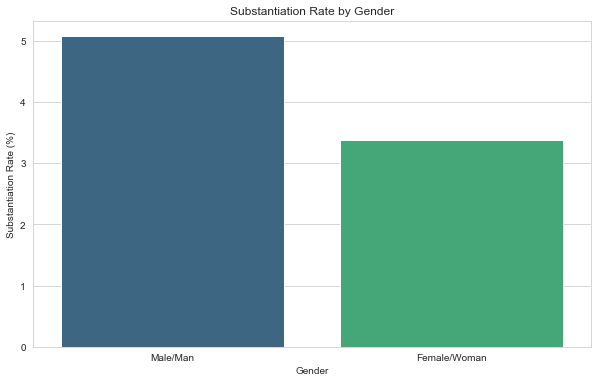

In [34]:
# Assuming you have a column named 'CCRB Allegation Disposition' containing values like 'Substantiated (Charges)'
# Assuming you also have columns named 'Victim / Alleged Victim Race (Legacy)' and 'Victim / Alleged Victim Gender'

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Define gender categories
gender_categories = ['Male/Man', 'Female/Woman', 'NA']

# Create a DataFrame to store the rates for visualization
visualization_data = pd.DataFrame(columns=['Gender', 'Substantiation Rate'])

# Calculate rates for each gender category
for gender_category in gender_categories:
    gender_data = ccrb1[ccrb1['Victim/Alleged Victim Gender'] == gender_category]
    
    total_complaints = len(gender_data)
    
    if total_complaints == 0:
        print(f"No complaints for the gender category: {gender_category}")
        continue
    
    # Filter data for various forms of Substantiated outcomes
    substantiated_data = gender_data[gender_data['CCRB Allegation Disposition'].isin(substantiated_forms)]
    substantiation_rate = len(substantiated_data) / total_complaints * 100

    # Store rates in the visualization DataFrame
    visualization_data.loc[len(visualization_data)] = [gender_category, substantiation_rate]

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Substantiation Rate', data=visualization_data, palette='viridis')
plt.title('Substantiation Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Substantiation Rate (%)')
plt.show()

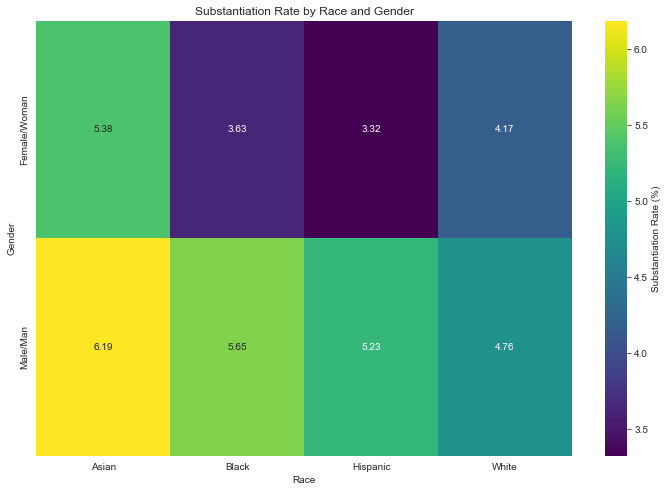

In [25]:
# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Define race and gender categories excluding 'Other Race', 'Unknown', and 'TGNC/Other'
race_categories = ['Hispanic', 'Black', 'White', 'Asian']
gender_categories = ['Male/Man', 'Female/Woman']

# Create a list to store the data
data_list = []

# Calculate rates for each race and gender combination
for race_category in race_categories:
    for gender_category in gender_categories:
        subset_data = ccrb1[(ccrb1['Victim / Alleged Victim Race (Legacy)'] == race_category) &
                            (ccrb1['Victim/Alleged Victim Gender'] == gender_category)]
        
        total_complaints = len(subset_data)
        
        if total_complaints == 0:
            print(f"No complaints for the race-gender combination: {race_category}-{gender_category}")
            continue
    
        # Filter data for various forms of Substantiated outcomes
        substantiated_data = subset_data[subset_data['CCRB Allegation Disposition'].isin(substantiated_forms)]
        substantiation_rate = len(substantiated_data) / total_complaints * 100

        # Append data to the list
        data_list.append({'Race': race_category, 'Gender': gender_category, 'Substantiation Rate': substantiation_rate})

# Create DataFrame from the list
visualization_data = pd.DataFrame(data_list)

# Pivot the DataFrame for heatmap
heatmap_data = visualization_data.pivot(index='Gender', columns='Race', values='Substantiation Rate')

# Visualization - Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Substantiation Rate (%)'})
plt.title('Substantiation Rate by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Gender')
plt.show()

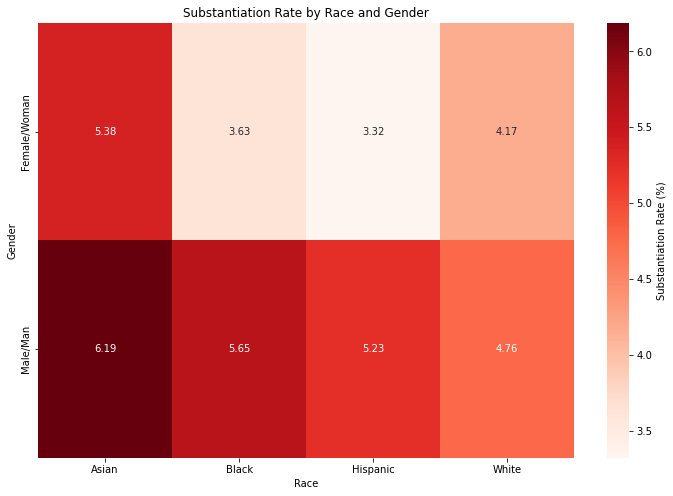

In [8]:
# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Define race and gender categories excluding 'Other Race', 'Unknown', and 'TGNC/Other'
race_categories = ['Hispanic', 'Black', 'White', 'Asian']
gender_categories = ['Male/Man', 'Female/Woman']

# Create a list to store the data
data_list = []

# Calculate rates for each race and gender combination
for race_category in race_categories:
    for gender_category in gender_categories:
        subset_data = ccrb1[(ccrb1['Victim / Alleged Victim Race (Legacy)'] == race_category) &
                            (ccrb1['Victim/Alleged Victim Gender'] == gender_category)]
        
        total_complaints = len(subset_data)
        
        if total_complaints == 0:
            print(f"No complaints for the race-gender combination: {race_category}-{gender_category}")
            continue
    
        # Filter data for various forms of Substantiated outcomes
        substantiated_data = subset_data[subset_data['CCRB Allegation Disposition'].isin(substantiated_forms)]
        substantiation_rate = len(substantiated_data) / total_complaints * 100

        # Append data to the list
        data_list.append({'Race': race_category, 'Gender': gender_category, 'Substantiation Rate': substantiation_rate})

# Create DataFrame from the list
visualization_data = pd.DataFrame(data_list)

# Pivot the DataFrame for heatmap
heatmap_data = visualization_data.pivot(index='Gender', columns='Race', values='Substantiation Rate')

# Visualization - Heatmap with red color scheme
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='Reds', cbar_kws={'label': 'Substantiation Rate (%)'})
plt.title('Substantiation Rate by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Gender')
plt.show()

/var/folders/xr/1s8qgqx11ql2kctd1jkz8j55q0752x/T/ipykernel_2981/1188539212.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  visualization_data = pd.concat([visualization_data, pd.DataFrame({


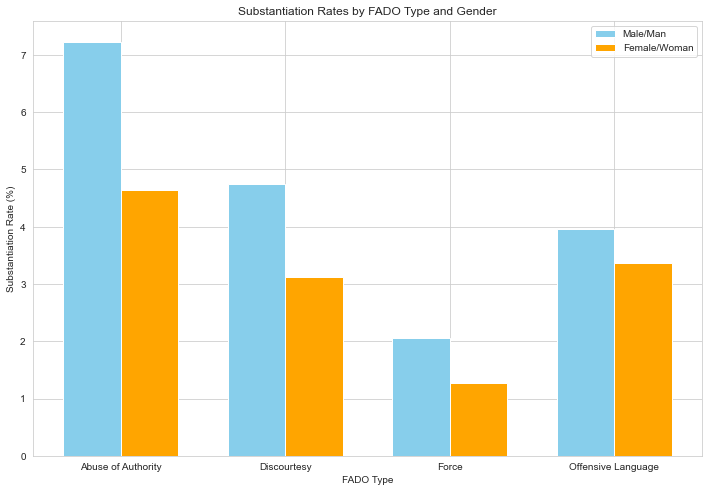

In [27]:
# Filter out rows with 'Unknown' or 'NA' in 'Victim/Alleged Victim Gender'
ccrb_filtered = ccrb[ccrb['Victim/Alleged Victim Gender'].isin(['Male/Man', 'Female/Woman'])]

# Filter out rows where 'FADO Type' is null or 'Untruthful Statement'
ccrb_filtered = ccrb_filtered.dropna(subset=['FADO Type'])
ccrb_filtered = ccrb_filtered[ccrb_filtered['FADO Type'] != 'Untruthful Statement']

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                       'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                       'Substantiated (Formal Training)']

# Define FADO Types
fado_types = ccrb_filtered['FADO Type'].unique()

# Create a DataFrame to store the rates for visualization
visualization_data = pd.DataFrame(columns=['FADO Type', 'Male Substantiation Rate', 'Female Substantiation Rate'])

# Calculate rates for each FADO Type
for fado_type in fado_types:
    fado_data = ccrb_filtered[ccrb_filtered['FADO Type'] == fado_type]
    
    # Calculate rates for Male/Man
    male_data = fado_data[fado_data['Victim/Alleged Victim Gender'] == 'Male/Man']
    male_total = len(male_data)
    male_substantiated = len(male_data[male_data['CCRB Allegation Disposition'].isin(substantiated_forms)])
    male_substantiation_rate = (male_substantiated / male_total) * 100 if male_total != 0 else 0
    
    # Calculate rates for Female/Woman
    female_data = fado_data[fado_data['Victim/Alleged Victim Gender'] == 'Female/Woman']
    female_total = len(female_data)
    female_substantiated = len(female_data[female_data['CCRB Allegation Disposition'].isin(substantiated_forms)])
    female_substantiation_rate = (female_substantiated / female_total) * 100 if female_total != 0 else 0
    
    # Store rates in the visualization DataFrame
    visualization_data = pd.concat([visualization_data, pd.DataFrame({
        'FADO Type': [fado_type],
        'Male Substantiation Rate': [male_substantiation_rate],
        'Female Substantiation Rate': [female_substantiation_rate]
    })], ignore_index=True)

# Visualization
plt.figure(figsize=(12, 8))
bar_width = 0.35
bar_positions = range(len(fado_types))

# Plot Male Substantiation Rates
plt.bar(bar_positions, visualization_data['Male Substantiation Rate'], color='skyblue', width=bar_width, label='Male/Man')

# Plot Female Substantiation Rates
plt.bar([pos + bar_width for pos in bar_positions], visualization_data['Female Substantiation Rate'], color='orange', width=bar_width, label='Female/Woman')

plt.title('Substantiation Rates by FADO Type and Gender')
plt.ylabel('Substantiation Rate (%)')
plt.xlabel('FADO Type')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], fado_types)
plt.legend()
plt.show()

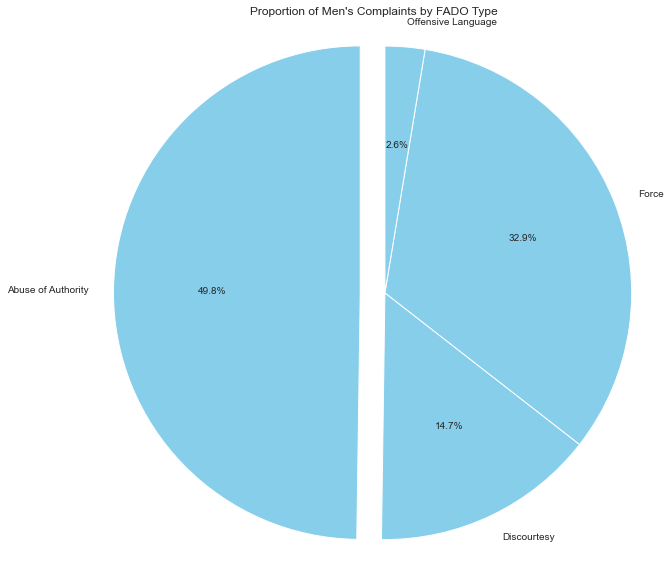

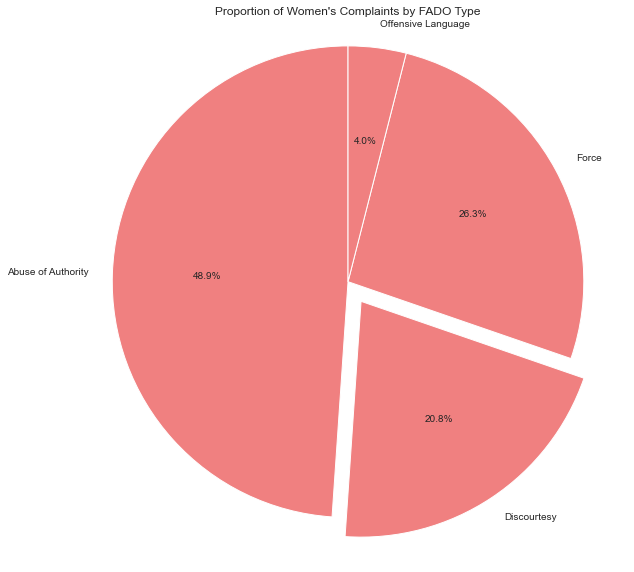

In [28]:
# Assuming 'ccrb' is your DataFrame

# Filter out rows with 'Unknown' or 'NA' in 'Victim/Alleged Victim Gender'
ccrb_filtered = ccrb[ccrb['Victim/Alleged Victim Gender'].isin(['Male/Man', 'Female/Woman'])]

# Filter out rows where 'FADO Type' is null or 'Untruthful Statement'
ccrb_filtered = ccrb_filtered.dropna(subset=['FADO Type'])
ccrb_filtered = ccrb_filtered[ccrb_filtered['FADO Type'] != 'Untruthful Statement']

# Group data by 'Victim/Alleged Victim Gender' and 'FADO Type' and count complaints
grouped_data = ccrb_filtered.groupby(['Victim/Alleged Victim Gender', 'FADO Type']).size().reset_index(name='Complaint Count')

# Pivot the DataFrame for easy plotting
pivot_data = grouped_data.pivot(index='FADO Type', columns='Victim/Alleged Victim Gender', values='Complaint Count')

# Visualization
colors = ['skyblue', 'lightcoral']

# Explode the slices for better visibility
explode_male = (0.1, 0, 0, 0)
explode_female = (0, 0.1, 0, 0)

plt.figure(figsize=(10, 10))
plt.pie(pivot_data['Male/Man'], labels=pivot_data.index, autopct='%1.1f%%', startangle=90, colors=[colors[0]], explode=explode_male)
plt.title('Proportion of Men\'s Complaints by FADO Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

plt.figure(figsize=(10, 10))
plt.pie(pivot_data['Female/Woman'], labels=pivot_data.index, autopct='%1.1f%%', startangle=90, colors=[colors[1]], explode=explode_female)
plt.title('Proportion of Women\'s Complaints by FADO Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

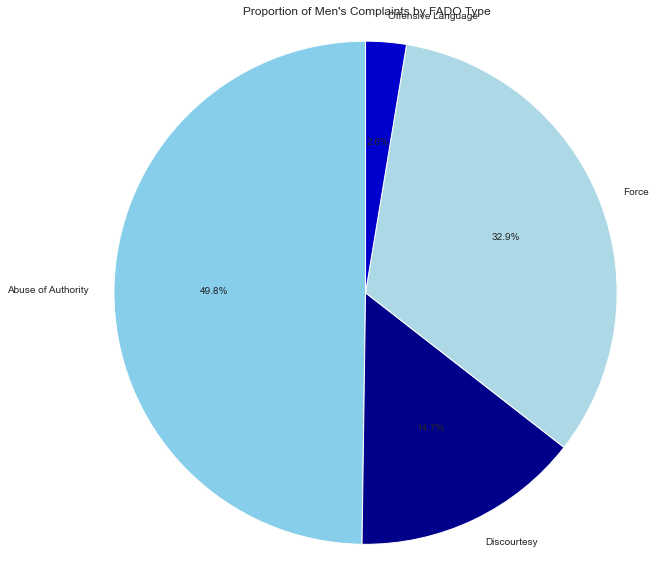

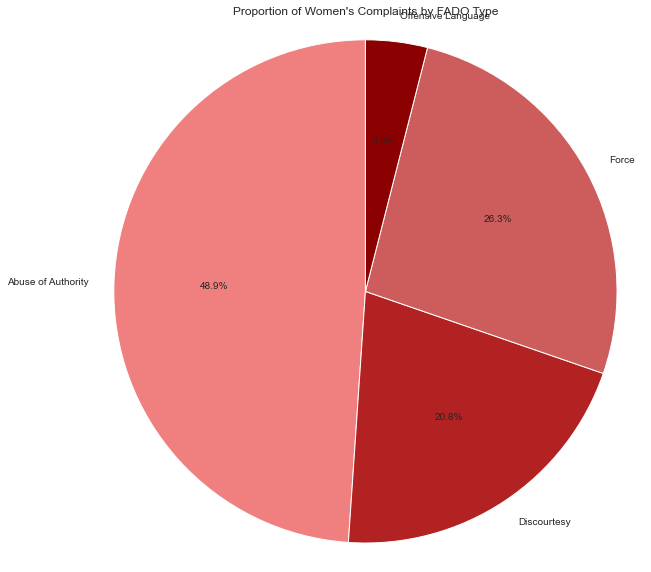

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ccrb' is your DataFrame

# Filter out rows with 'Unknown' or 'NA' in 'Victim/Alleged Victim Gender'
ccrb_filtered = ccrb[ccrb['Victim/Alleged Victim Gender'].isin(['Male/Man', 'Female/Woman'])]

# Filter out rows where 'FADO Type' is null or 'Untruthful Statement'
ccrb_filtered = ccrb_filtered.dropna(subset=['FADO Type'])
ccrb_filtered = ccrb_filtered[ccrb_filtered['FADO Type'] != 'Untruthful Statement']

# Group data by 'Victim/Alleged Victim Gender' and 'FADO Type' and count complaints
grouped_data = ccrb_filtered.groupby(['Victim/Alleged Victim Gender', 'FADO Type']).size().reset_index(name='Complaint Count')

# Pivot the DataFrame for easy plotting
pivot_data = grouped_data.pivot(index='FADO Type', columns='Victim/Alleged Victim Gender', values='Complaint Count')

# Visualization
colors_male = ['skyblue', 'darkblue', 'lightblue', 'mediumblue']
colors_female = ['lightcoral', 'firebrick', 'indianred', 'darkred']

plt.figure(figsize=(10, 10))
plt.pie(pivot_data['Male/Man'], labels=pivot_data.index, autopct='%1.1f%%', startangle=90, colors=colors_male)
plt.title('Proportion of Men\'s Complaints by FADO Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

plt.figure(figsize=(10, 10))
plt.pie(pivot_data['Female/Woman'], labels=pivot_data.index, autopct='%1.1f%%', startangle=90, colors=colors_female)
plt.title('Proportion of Women\'s Complaints by FADO Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

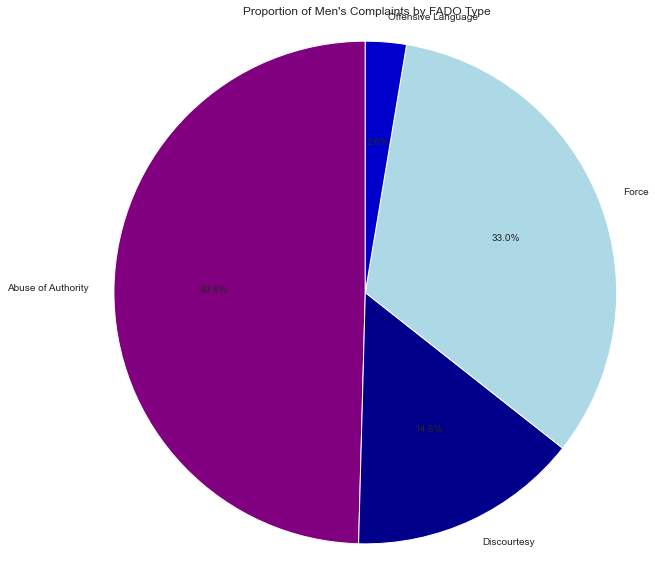

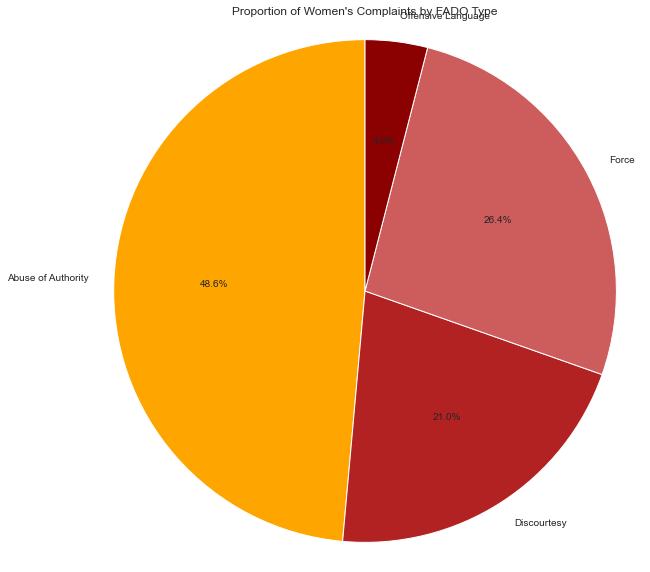

In [33]:
# Assuming 'ccrb' is your DataFrame

# Filter out rows with 'Unknown' or 'NA' in 'Victim/Alleged Victim Gender'
ccrb_filtered = ccrb[ccrb['Victim/Alleged Victim Gender'].isin(['Male/Man', 'Female/Woman'])]

# Filter out rows where 'FADO Type' is null or 'Untruthful Statement'
ccrb_filtered = ccrb_filtered.dropna(subset=['FADO Type'])
ccrb_filtered = ccrb_filtered[ccrb_filtered['FADO Type'] != 'Untruthful Statement']

# Group data by 'Victim/Alleged Victim Gender' and 'FADO Type' and count complaints
grouped_data = ccrb_filtered.groupby(['Victim/Alleged Victim Gender', 'FADO Type']).size().reset_index(name='Complaint Count')

# Pivot the DataFrame for easy plotting
pivot_data = grouped_data.pivot(index='FADO Type', columns='Victim/Alleged Victim Gender', values='Complaint Count')

# Visualization
colors_male = ['purple', 'darkblue', 'lightblue', 'mediumblue']
colors_female = ['orange', 'firebrick', 'indianred', 'darkred']

plt.figure(figsize=(10, 10))
plt.pie(pivot_data['Male/Man'], labels=pivot_data.index, autopct='%1.1f%%', startangle=90, colors=colors_male)
plt.title('Proportion of Men\'s Complaints by FADO Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

plt.figure(figsize=(10, 10))
plt.pie(pivot_data['Female/Woman'], labels=pivot_data.index, autopct='%1.1f%%', startangle=90, colors=colors_female)
plt.title('Proportion of Women\'s Complaints by FADO Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

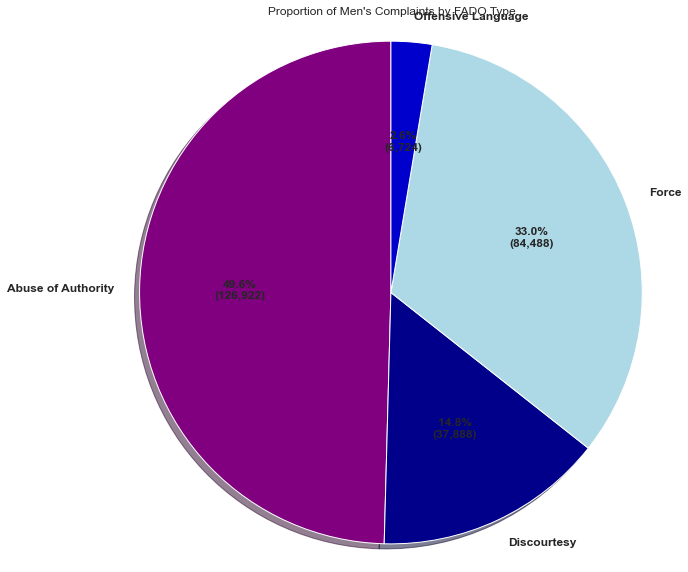

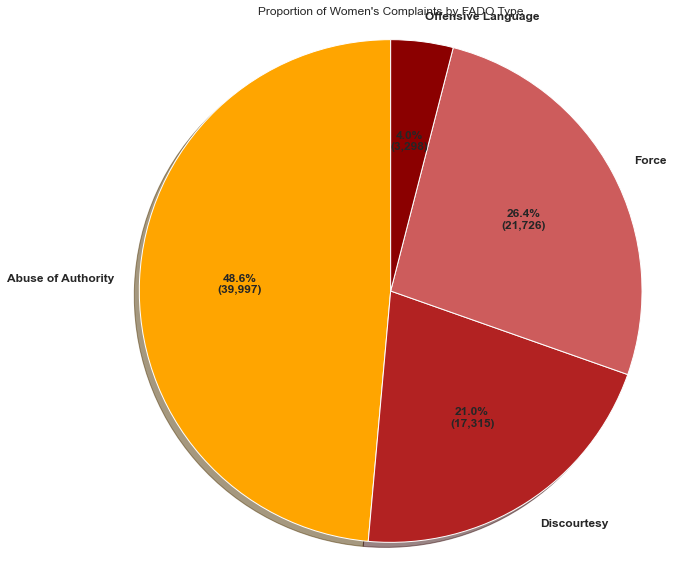

In [34]:
# Assuming 'ccrb' is your DataFrame

# Filter out rows with 'Unknown' or 'NA' in 'Victim/Alleged Victim Gender'
ccrb_filtered = ccrb[ccrb['Victim/Alleged Victim Gender'].isin(['Male/Man', 'Female/Woman'])]

# Filter out rows where 'FADO Type' is null or 'Untruthful Statement'
ccrb_filtered = ccrb_filtered.dropna(subset=['FADO Type'])
ccrb_filtered = ccrb_filtered[ccrb_filtered['FADO Type'] != 'Untruthful Statement']

# Group data by 'Victim/Alleged Victim Gender' and 'FADO Type' and count complaints
grouped_data = ccrb_filtered.groupby(['Victim/Alleged Victim Gender', 'FADO Type']).size().reset_index(name='Complaint Count')

# Pivot the DataFrame for easy plotting
pivot_data = grouped_data.pivot(index='FADO Type', columns='Victim/Alleged Victim Gender', values='Complaint Count')

# Visualization
colors_male = ['purple', 'darkblue', 'lightblue', 'mediumblue']
colors_female = ['orange', 'firebrick', 'indianred', 'darkred']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:,d})'
    return my_autopct

plt.figure(figsize=(10, 10))
plt.pie(pivot_data['Male/Man'], labels=pivot_data.index, autopct=make_autopct(pivot_data['Male/Man']),
        startangle=90, colors=colors_male, textprops=dict(fontsize=12, fontweight='bold'), shadow=True)
plt.title('Proportion of Men\'s Complaints by FADO Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

plt.figure(figsize=(10, 10))
plt.pie(pivot_data['Female/Woman'], labels=pivot_data.index, autopct=make_autopct(pivot_data['Female/Woman']),
        startangle=90, colors=colors_female, textprops=dict(fontsize=12, fontweight='bold'), shadow=True)
plt.title('Proportion of Women\'s Complaints by FADO Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

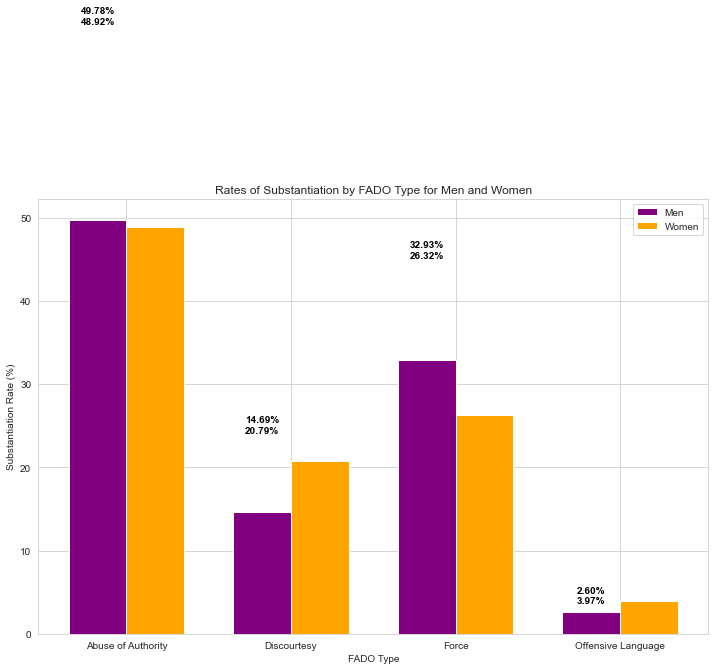

In [30]:
# Assuming 'ccrb' is your DataFrame

# Filter out rows with 'Unknown' or 'NA' in 'Victim/Alleged Victim Gender'
ccrb_filtered = ccrb[ccrb['Victim/Alleged Victim Gender'].isin(['Male/Man', 'Female/Woman'])]

# Filter out rows where 'FADO Type' is null or 'Untruthful Statement'
ccrb_filtered = ccrb_filtered.dropna(subset=['FADO Type'])
ccrb_filtered = ccrb_filtered[ccrb_filtered['FADO Type'] != 'Untruthful Statement']

# Group data by 'Victim/Alleged Victim Gender' and 'FADO Type' and count complaints
grouped_data = ccrb_filtered.groupby(['Victim/Alleged Victim Gender', 'FADO Type']).size().reset_index(name='Complaint Count')

# Pivot the DataFrame for easy plotting
pivot_data = grouped_data.pivot(index='FADO Type', columns='Victim/Alleged Victim Gender', values='Complaint Count')

# Calculate rates for each FADO Type
pivot_data['Male/Man Rate'] = pivot_data['Male/Man'] / pivot_data['Male/Man'].sum() * 100
pivot_data['Female/Woman Rate'] = pivot_data['Female/Woman'] / pivot_data['Female/Woman'].sum() * 100

# Visualization
bar_width = 0.35
bar_positions = range(len(pivot_data))

plt.figure(figsize=(12, 8))

# Plot bars for men
plt.bar(bar_positions, pivot_data['Male/Man Rate'], color='purple', width=bar_width, label='Men')

# Plot bars for women
plt.bar([pos + bar_width for pos in bar_positions], pivot_data['Female/Woman Rate'], color='orange', width=bar_width, label='Women')

# Add data labels
for pos, (fado_type, male_rate, female_rate) in enumerate(zip(pivot_data.index, pivot_data['Male/Man Rate'], pivot_data['Female/Woman Rate'])):
    plt.text(pos, male_rate + female_rate / 2, f'{male_rate:.2f}%\n{female_rate:.2f}%', ha='center', va='center', color='black', fontweight='bold')

plt.title('Rates of Substantiation by FADO Type for Men and Women')
plt.ylabel('Substantiation Rate (%)')
plt.xlabel('FADO Type')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], pivot_data.index)
plt.legend()
plt.show()

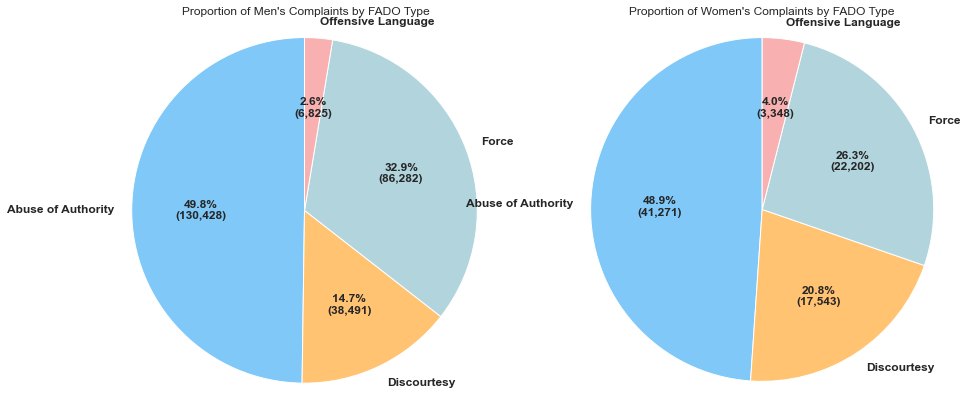

In [31]:
# Assuming 'ccrb' is your DataFrame

# Filter out rows with 'Unknown' or 'NA' in 'Victim/Alleged Victim Gender'
ccrb_filtered = ccrb[ccrb['Victim/Alleged Victim Gender'].isin(['Male/Man', 'Female/Woman'])]

# Filter out rows where 'FADO Type' is null or 'Untruthful Statement'
ccrb_filtered = ccrb_filtered.dropna(subset=['FADO Type'])
ccrb_filtered = ccrb_filtered[ccrb_filtered['FADO Type'] != 'Untruthful Statement']

# Group data by 'Victim/Alleged Victim Gender' and 'FADO Type' and count complaints
grouped_data = ccrb_filtered.groupby(['Victim/Alleged Victim Gender', 'FADO Type']).size().reset_index(name='Complaint Count')

# Pivot the DataFrame for easy plotting
pivot_data = grouped_data.pivot(index='FADO Type', columns='Victim/Alleged Victim Gender', values='Complaint Count')

# Visualization
colors_neutral = ['#7FC8F8', '#FFC371', '#B2D4DD', '#F8B0B0']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:,d})'
    return my_autopct

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot for Men
axs[0].pie(pivot_data['Male/Man'], labels=pivot_data.index, autopct=make_autopct(pivot_data['Male/Man']),
           startangle=90, colors=colors_neutral, textprops=dict(fontsize=12, fontweight='bold'), shadow=False)
axs[0].set_title('Proportion of Men\'s Complaints by FADO Type')
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot for Women
axs[1].pie(pivot_data['Female/Woman'], labels=pivot_data.index, autopct=make_autopct(pivot_data['Female/Woman']),
           startangle=90, colors=colors_neutral, textprops=dict(fontsize=12, fontweight='bold'), shadow=False)
axs[1].set_title('Proportion of Women\'s Complaints by FADO Type')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

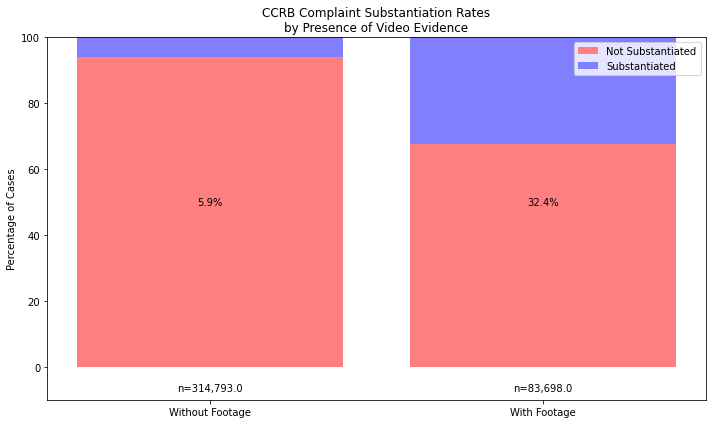


Detailed Statistics:
             substantiated_rate  not_substantiated_rate  total_cases
has_footage                                                         
False                      5.92                   94.08     314793.0
True                      32.37                   67.63      83698.0


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                      'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                      'Substantiated (Formal Training)']

# Create a footage indicator (True if either BWC or Video evidence exists)
ccrb['has_footage'] = (ccrb['BWC Evidence'] == 'Yes') | (ccrb['Video Evidence'] == 'Yes')

# Calculate substantiation for each group
def calculate_rates(group):
    total = len(group)
    substantiated = group['CCRB Complaint Disposition'].isin(substantiated_forms).sum()
    return pd.Series({
        'substantiated_rate': (substantiated / total) * 100,
        'not_substantiated_rate': ((total - substantiated) / total) * 100,
        'total_cases': total
    })

results = ccrb.groupby('has_footage').apply(calculate_rates).round(2)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
bar_width = 0.35
plt.bar(range(len(results)), results['not_substantiated_rate'], 
        label='Not Substantiated', color='#ff7f7f')
plt.bar(range(len(results)), results['substantiated_rate'], 
        bottom=results['not_substantiated_rate'], label='Substantiated', color='#7f7fff')

# Customize the plot
plt.xticks(range(len(results)), ['Without Footage', 'With Footage'])
plt.ylabel('Percentage of Cases')
plt.title('CCRB Complaint Substantiation Rates\nby Presence of Video Evidence')

# Add value labels on the bars
for i in range(len(results)):
    # Add percentage labels
    plt.text(i, 50, f"{results.iloc[i]['substantiated_rate']:.1f}%", 
             ha='center', va='center')
    
    # Add total cases below the bars
    plt.text(i, -5, f"n={results.iloc[i]['total_cases']:,}", 
             ha='center', va='top')

plt.legend(loc='upper right')
plt.ylim(-10, 100)  # Extend y-axis slightly below 0 to show case counts

# Show plot
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
print(results.round(2).to_string())

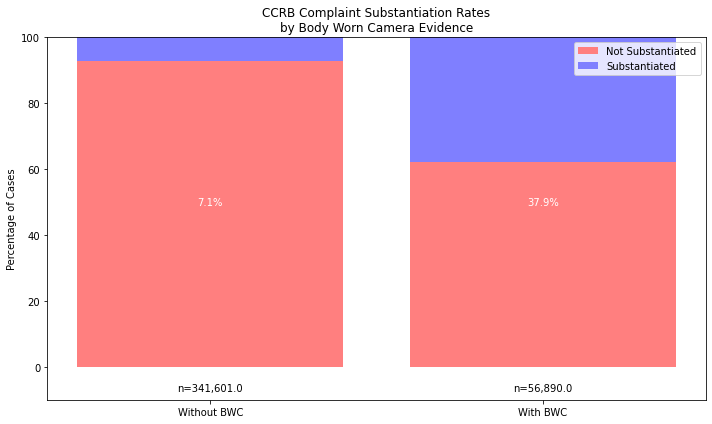


Detailed Statistics:
         substantiated_rate  not_substantiated_rate  total_cases
has_bwc                                                         
False                  7.08                   92.92     341601.0
True                  37.89                   62.11      56890.0

Breakdown of BWC cases:
BWC Evidence
No     341601
Yes     56890
Name: count, dtype: int64


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                      'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                      'Substantiated (Formal Training)']

# Create a footage indicator for BWC only
ccrb['has_bwc'] = ccrb['BWC Evidence'] == 'Yes'

# Calculate substantiation for each group
def calculate_rates(group):
    total = len(group)
    substantiated = group['CCRB Complaint Disposition'].isin(substantiated_forms).sum()
    return pd.Series({
        'substantiated_rate': (substantiated / total) * 100,
        'not_substantiated_rate': ((total - substantiated) / total) * 100,
        'total_cases': total
    })

results = ccrb.groupby('has_bwc').apply(calculate_rates).round(2)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
bar_width = 0.35
plt.bar(range(len(results)), results['not_substantiated_rate'], 
        label='Not Substantiated', color='#ff7f7f')
plt.bar(range(len(results)), results['substantiated_rate'], 
        bottom=results['not_substantiated_rate'], label='Substantiated', color='#7f7fff')

# Customize the plot
plt.xticks(range(len(results)), ['Without BWC', 'With BWC'])
plt.ylabel('Percentage of Cases')
plt.title('CCRB Complaint Substantiation Rates\nby Body Worn Camera Evidence')

# Add value labels on the bars
for i in range(len(results)):
    # Add percentage labels
    plt.text(i, 50, f"{results.iloc[i]['substantiated_rate']:.1f}%", 
             ha='center', va='center', color='white')
    
    # Add total cases below the bars
    plt.text(i, -5, f"n={results.iloc[i]['total_cases']:,}", 
             ha='center', va='top')

plt.legend(loc='upper right')
plt.ylim(-10, 100)  # Extend y-axis slightly below 0 to show case counts

# Show plot
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
print(results.round(2).to_string())

# Print additional breakdown
print("\nBreakdown of BWC cases:")
bwc_counts = ccrb['BWC Evidence'].value_counts()
print(bwc_counts)

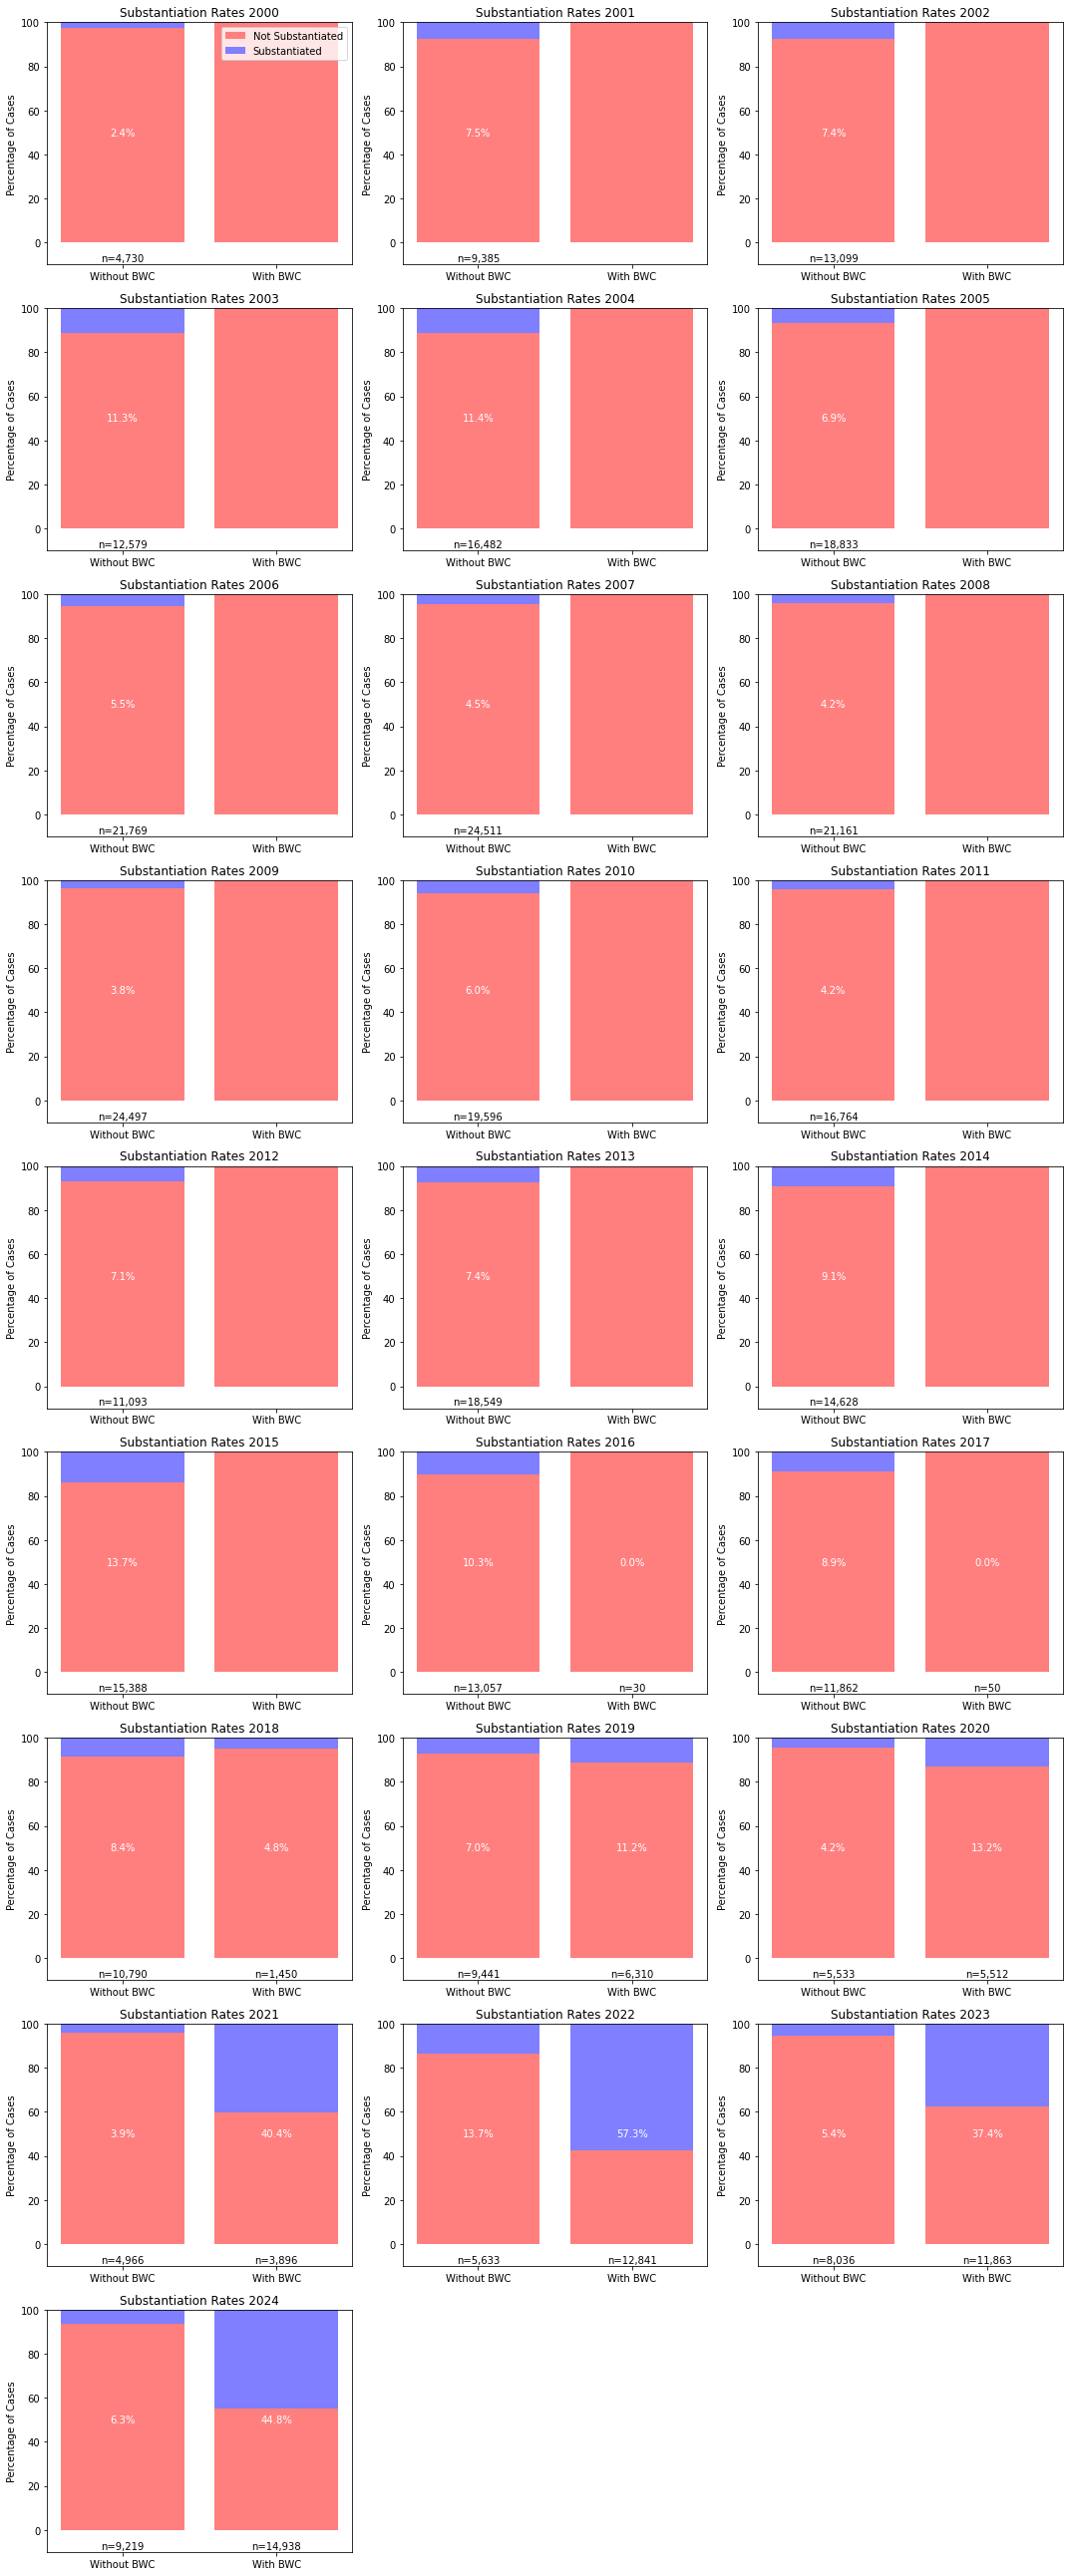


Summary of BWC cases by year:
      No BWC Rate  BWC Rate
year                       
2000         2.43       NaN
2001         7.49       NaN
2002         7.43       NaN
2003        11.26       NaN
2004        11.39       NaN
2005         6.90       NaN
2006         5.54       NaN
2007         4.53       NaN
2008         4.20       NaN
2009         3.76       NaN
2010         6.02       NaN
2011         4.21       NaN
2012         7.09       NaN
2013         7.43       NaN
2014         9.13       NaN
2015        13.68       NaN
2016        10.27      0.00
2017         8.86      0.00
2018         8.39      4.83
2019         7.01     11.16
2020         4.23     13.23
2021         3.91     40.37
2022        13.69     57.27
2023         5.36     37.40
2024         6.33     44.79

Total cases by year:
year
2000     4730
2001     9385
2002    13099
2003    12579
2004    16482
2005    18833
2006    21769
2007    24511
2008    21161
2009    24497
2010    19596
2011    16764
2012    11093
2013

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                      'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                      'Substantiated (Formal Training)']

# Create a footage indicator for BWC only
ccrb['has_bwc'] = ccrb['BWC Evidence'] == 'Yes'

# Extract year from the Close Date
ccrb['year'] = pd.to_datetime(ccrb['Close Date']).dt.year

# Calculate substantiation rates for each year
years = sorted(ccrb['year'].unique())
n_years = len(years)
n_cols = 3
n_rows = (n_years + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
if n_rows == 1:
    axes = [axes]  # Convert to list if only one row
axes = [ax if isinstance(ax, np.ndarray) else [ax] for ax in axes]  # Ensure 2D structure

for year_idx, year in enumerate(years):
    row = year_idx // n_cols
    col = year_idx % n_cols
    
    # Get data for this year
    year_data = ccrb[ccrb['year'] == year]
    
    # Calculate rates for with/without BWC
    results = []
    for has_bwc in [False, True]:
        group_data = year_data[year_data['has_bwc'] == has_bwc]
        total = len(group_data)
        if total == 0:
            results.append({'substantiated_rate': 0, 'total': 0})
            continue
        
        substantiated = group_data['CCRB Complaint Disposition'].isin(substantiated_forms).sum()
        results.append({
            'substantiated_rate': (substantiated / total) * 100,
            'total': total
        })
    
    # Plot for this year
    ax = axes[row][col]
    
    # Create bars
    x = np.arange(2)
    substantiated_rates = [r['substantiated_rate'] for r in results]
    not_substantiated_rates = [100 - r['substantiated_rate'] for r in results]
    
    ax.bar(x, not_substantiated_rates, label='Not Substantiated', color='#ff7f7f')
    ax.bar(x, substantiated_rates, bottom=not_substantiated_rates, label='Substantiated', color='#7f7fff')
    
    # Add labels
    ax.set_title(f'Substantiation Rates {year}')
    ax.set_xticks(x)
    ax.set_xticklabels(['Without BWC', 'With BWC'])
    ax.set_ylabel('Percentage of Cases')
    
    # Add value labels
    for i in range(2):
        if results[i]['total'] > 0:
            # Percentage label
            ax.text(i, 50, f"{substantiated_rates[i]:.1f}%",
                   ha='center', va='center', color='white')
            # Total cases label
            ax.text(i, -5, f"n={results[i]['total']:,}",
                   ha='center', va='top')
    
    ax.set_ylim(-10, 100)
    
    # Add legend to first plot only
    if year_idx == 0:
        ax.legend(loc='upper right')

# Remove any unused subplots
for idx in range(len(years), n_rows * n_cols):
    row = idx // n_cols
    col = idx % n_cols
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary of BWC cases by year:")
yearly_summary = ccrb.groupby(['year', 'has_bwc']).agg({
    'CCRB Complaint Disposition': lambda x: (x.isin(substantiated_forms).sum() / len(x) * 100).round(2)
}).unstack()
yearly_summary.columns = ['No BWC Rate', 'BWC Rate']
print(yearly_summary)

print("\nTotal cases by year:")
print(ccrb.groupby('year').size())

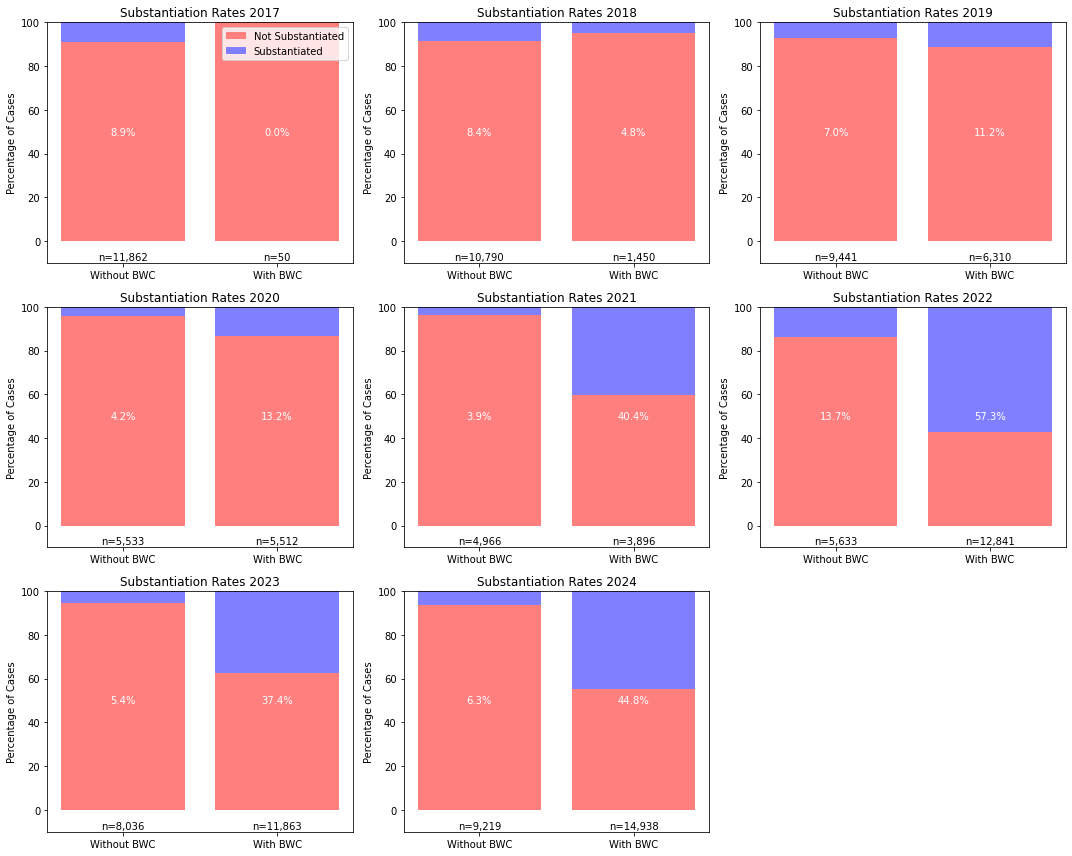


JSON-formatted data:
[
  {
    "year": 2017,
    "no_bwc_total": 11862,
    "no_bwc_substantiated_rate": 8.86,
    "no_bwc_not_substantiated_rate": 91.14,
    "bwc_total": 50,
    "bwc_substantiated_rate": 0.0,
    "bwc_not_substantiated_rate": 100.0
  },
  {
    "year": 2018,
    "no_bwc_total": 10790,
    "no_bwc_substantiated_rate": 8.39,
    "no_bwc_not_substantiated_rate": 91.61,
    "bwc_total": 1450,
    "bwc_substantiated_rate": 4.83,
    "bwc_not_substantiated_rate": 95.17
  },
  {
    "year": 2019,
    "no_bwc_total": 9441,
    "no_bwc_substantiated_rate": 7.01,
    "no_bwc_not_substantiated_rate": 92.99,
    "bwc_total": 6310,
    "bwc_substantiated_rate": 11.16,
    "bwc_not_substantiated_rate": 88.84
  },
  {
    "year": 2020,
    "no_bwc_total": 5533,
    "no_bwc_substantiated_rate": 4.23,
    "no_bwc_not_substantiated_rate": 95.77,
    "bwc_total": 5512,
    "bwc_substantiated_rate": 13.23,
    "bwc_not_substantiated_rate": 86.77
  },
  {
    "year": 2021,
    "no_bwc_t

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json

# Define various forms of Substantiated outcomes
substantiated_forms = ['Substantiated (Charges)', 'Substantiated (Command Discipline A)',
                      'Substantiated (Command Discipline B)', 'Substantiated (Command Discipline)',
                      'Substantiated (Formal Training)']

# Create a footage indicator for BWC only
ccrb['has_bwc'] = ccrb['BWC Evidence'] == 'Yes'

# Extract year and filter for 2017-2024
ccrb['year'] = pd.to_datetime(ccrb['Close Date']).dt.year
filtered_ccrb = ccrb[ccrb['year'].between(2017, 2024)]

# Prepare data for both visualization and JSON export
years = sorted(filtered_ccrb['year'].unique())
json_data = []

# Calculate rates and prepare JSON data
for year in years:
    year_data = filtered_ccrb[filtered_ccrb['year'] == year]
    year_stats = {'year': int(year)}
    
    for has_bwc in [False, True]:
        group_data = year_data[year_data['has_bwc'] == has_bwc]
        total = len(group_data)
        
        if total > 0:
            substantiated = group_data['CCRB Complaint Disposition'].isin(substantiated_forms).sum()
            substantiated_rate = (substantiated / total) * 100
            not_substantiated_rate = 100 - substantiated_rate
        else:
            substantiated_rate = 0
            not_substantiated_rate = 0
            
        prefix = 'bwc' if has_bwc else 'no_bwc'
        year_stats.update({
            f'{prefix}_total': int(total),
            f'{prefix}_substantiated_rate': round(substantiated_rate, 2),
            f'{prefix}_not_substantiated_rate': round(not_substantiated_rate, 2)
        })
    
    json_data.append(year_stats)

# Create visualization
n_years = len(years)
n_cols = 3
n_rows = (n_years + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
if n_rows == 1:
    axes = [axes]
axes = [ax if isinstance(ax, np.ndarray) else [ax] for ax in axes]

for year_idx, year_stats in enumerate(json_data):
    row = year_idx // n_cols
    col = year_idx % n_cols
    
    # Plot for this year
    ax = axes[row][col]
    
    # Create bars
    x = np.arange(2)
    substantiated_rates = [year_stats['no_bwc_substantiated_rate'], 
                         year_stats['bwc_substantiated_rate']]
    not_substantiated_rates = [year_stats['no_bwc_not_substantiated_rate'],
                             year_stats['bwc_not_substantiated_rate']]
    
    ax.bar(x, not_substantiated_rates, label='Not Substantiated', color='#ff7f7f')
    ax.bar(x, substantiated_rates, bottom=not_substantiated_rates, label='Substantiated', color='#7f7fff')
    
    # Add labels
    ax.set_title(f'Substantiation Rates {year_stats["year"]}')
    ax.set_xticks(x)
    ax.set_xticklabels(['Without BWC', 'With BWC'])
    ax.set_ylabel('Percentage of Cases')
    
    # Add value labels
    for i in range(2):
        total = year_stats['no_bwc_total'] if i == 0 else year_stats['bwc_total']
        rate = substantiated_rates[i]
        if total > 0:
            ax.text(i, 50, f"{rate:.1f}%",
                   ha='center', va='center', color='white')
            ax.text(i, -5, f"n={total:,}",
                   ha='center', va='top')
    
    ax.set_ylim(-10, 100)
    
    if year_idx == 0:
        ax.legend(loc='upper right')

# Remove any unused subplots
for idx in range(len(years), n_rows * n_cols):
    row = idx // n_cols
    col = idx % n_cols
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()

# Output JSON data
print("\nJSON-formatted data:")
print(json.dumps(json_data, indent=2))

# Save to file
with open('ccrb_bwc_stats.json', 'w') as f:
    json.dump(json_data, f, indent=2)
print("\nData saved to 'ccrb_bwc_stats.json'")